# 🧮 Skill Damage Simulation & Analysis Framework

This project models and compares **combat damage output** across multiple adventurers, using a detailed simulation framework that incorporates **weapon coefficients**, **damage types**, **combat rounds**, and **passive/gear-based buffs**. It is built to analyze **per-skill performance**, **multi-round cumulative damage**, and the **relative impact of build choices** in a configurable and extensible way.

---

## 🎯 Project Objectives

* 📊 **Compare skill performance** across adventurers (Leonardo, Gagarin, Dragon Girl)
* 🔁 **Simulate multi-round combat**, tracking total and per-skill damage
* ⚖️ **Normalize performance** to a baseline (e.g., Leonardo) for relative analysis
* 🧪 **Test build variations** using configurable `SCENARIO` dictionaries
* 🧠 **Support strategy optimization** through data analysis and clear visualizations

---

## 🧱 System Architecture

### 1. 🔧 Scenario Configuration

Each scenario defines a simulated build using a dictionary of modifiers:

```python
SCENARIO = {
    "Num_Daggers": 25,
    "Dagger_DMG_pct": 85,
    "Physical_DMG_pct": 90,
    "Bonus_Dagger_Coef": 0.09,
    "Num_Rage_Strikes": 3
}
```

These modify attributes like bonus coefficients, damage types, skill hit counts, and more.

### 2. 🧠 Skill & Damage Simulation

Each adventurer has a dedicated simulation function that:

* Applies adventurer-specific **passives and scaling**
* Uses shared helper utilities to compute:

  * `Final_ATK`
  * Per-skill base + bonus coefficients
  * Buff interactions (e.g., global%, final%, relative damage)
  * Crit multipliers (if applicable)
* Tracks **round-by-round skill usage**, cooldowns, and delayed effects

Helper functions:

* `compute_damage()` – Core per-hit damage calculator
* `apply_adventurer_passives()` – Injects unit-specific bonuses into config
* `calculate_final_atk()` – Centralized ATK calculation formula

### 3. 📊 Output Aggregation

Two primary dataframes:

* `df_all_skills` – per-skill, per-use damage (for scaling comparisons)
* `df_final_round` – total 10-round cumulative damage per unit per scenario

Round-level logic includes:

* Handling of skill cooldowns (e.g., Leonardo’s HSD every 2–3 turns)
* Delayed damage triggers (e.g., Gagarin’s bomb after 2 rounds)

### 4. 📈 Visualization Tools

Custom plots help explore:

* Skill scaling across levels
* Total cumulative output by adventurer
* Normalized comparisons (e.g., vs. Leonardo)
* Damage composition breakdowns (daggers, rage, missiles, etc.)
* Percent difference plots to evaluate buffs and gem effects

---

## 🧪 Example Use Cases

### Simulate 10-round damage for multiple adventurers:

```python
df_leo_skill, df_leo_rounds = run_leo_scenario(SCENARIO_X, "Scenario 1")
df_gaga_skill, df_gaga_rounds = run_gaga_scenario(SCENARIO_X, "Scenario 1")
df_dg_skill, df_dg_rounds     = run_dg_scenario(SCENARIO_X, "Scenario 1")
```

### Merge and compare cumulative outputs:

```python
df_final_round = pd.concat([df_leo_rounds, df_gaga_rounds, df_dg_rounds])
```

### Normalize relative to Leonardo:

```python
df_baseline = df_final_round[df_final_round["source"] == "leonardo"]
df_final_round = df_final_round.merge(df_baseline, on=["level", "scenario"], suffixes=("", "_leo"))
df_final_round["normalized"] = df_final_round["total_damage"] / df_final_round["total_damage_leo"]
```

---

## ⚙️ Assumptions & Formulas

### 🎯 Player Base Stats

```python
P_ATK = 10_000_000
P_Strength = 1.15
P_ATK_pct = 3000           # +3000%
P_Global_ATK_pct = 250     # +250%
```

Final ATK formula:

```python
Final_ATK = P_ATK × Strength × (1 + P_ATK_pct/100) × (1 + Global_ATK_pct/100)
```

### 💀 Enemy Stats

```python
A_DEF = 0
Target_HP = 3_500_000_000_000  # Used for %HP-based skills and caps
```

---

## 📊 Key Visualizations

* **📈 Line Plot**: Damage per skill per level
* **📊 Bar Plot**: Normalized damage vs Leonardo
* **📦 Stacked Bar**: Component-wise damage breakdown
* **🌀 Line Plot**: Cumulative damage across 10 rounds
* **📉 Delta Charts**: Percent difference between scenarios


In [1]:
BASE_CONFIG = dict(

    # === Core Player Stats ===
    P_ATK=10_000_000,               # Base Attack Power
    P_Strength=1.15,                # Strength Multiplier
    P_ATK_pct=3000,                 # +3000% ATK Bonus
    P_Global_ATK_pct=250,           # +250% Global Bonus

    # === Critical Hit Rates (all in %) ===
    Crit_Chance_pct=100,            # Applies to all types unless overridden
    Skill_Crit_Chance_pct=100,
    Weapon_Crit_Chance_pct=100,
    Basic_Crit_Chance_pct=100,
    Crit_DMG_pct=400,               # +400% crit damage (base = 100%)

    # === Damage Type Bonuses (Local) ===
    Skill_DMG_pct=200,
    Physical_DMG_pct=0,
    Dagger_DMG_pct=35,
    Bolt_DMG_pct=0,
    Chi_DMG_pct=0,
    Flame_DMG_pct=0,
    Fire_DMG_pct=0,
    Ice_DMG_pct=0,
    Lightning_DMG_pct=0,
    Basic_ATK_DMG_pct=0,
    Combo_DMG_pct=0,
    Rage_DMG_pct=0,
    Counter_DMG_pct=0,
    Poison_DMG_pct=0,
    Burn_DMG_pct=0,
    Light_Spear_DMG_pct=0,
    DoT_DMG_pct=0,
    Damage_pct=0,

    # === Global Damage Type Bonuses (Multiplicative Layer) ===
    Global_DMG_pct=0,
    Global_Skill_DMG_pct=0,
    Global_Physical_DMG_pct=0,
    Global_Dagger_DMG_pct=0,
    Global_Bolt_DMG_pct=0,
    Global_Chi_DMG_pct=0,
    Global_Flame_DMG_pct=0,
    Global_Fire_DMG_pct=0,
    Global_Ice_DMG_pct=0,
    Global_Lightning_DMG_pct=0,
    Global_Basic_ATK_DMG_pct=0,
    Global_Combo_DMG_pct=0,
    Global_Rage_DMG_pct=0,
    Global_Counter_DMG_pct=0,
    Global_Poison_DMG_pct=0,
    Global_Burn_DMG_pct=0,
    Global_Light_Spear_DMG_pct=0,
    Global_DoT_DMG_pct=0,

    # === Final Modifier Layer ===
    Final_DMG_pct=0,

    # === Weapon Coefficient Modifiers (Additive to base coef) ===
    Bonus_Dagger_Coef=0,
    Bonus_Bolt_Coef=0,
    Bonus_Chi_Coef=0,
    Bonus_Rage_Coef=0,
    Bonus_Light_Spear_Coef=0,
    Bonus_Icy_Spike_Coef=0,
    Bonus_Basic_Coef=0,
    Bonus_Combo_Coef=0,
    Bonus_Counter_Coef=0,
    Bonus_Poison_Coef=0,
    Bonus_Burn_Coef=0,

    # === Skill Usage Counts ===
    Num_Combos=5,                   # Number of combo attacks (replaces Num_Attacks)
    Num_Basic_Attacks=1,           # Typically 1 opening basic attack
    Num_Daggers=14,
    Num_Rage_Strikes=1,
    Num_Bolts=1,
    Num_Chi_Hits=1,
    Num_Burns=1,
    Num_Poisons=1,
    Num_Light_Spears=1,
    Num_Icy_Spikes=1,
    Num_Counter_Attacks=1,

    # === DoT Stack Settings ===
    Max_Poison_Stacks=5,
    Max_Burn_Stacks=5,

    # === Battle Environment ===
    Rage_ATK_coef=2.6,  # Coefficient for Rage attacks
    Use_Whisper=True,
    ENEMY_HP=3_500_000_000,
    MAX_HP=3_500_000_000
)


# === SCENARIOS TO COMPARE ===

SCENARIO_1 = {
    "name": "",
    "Num_Daggers": 14,
    "Bonus_Dagger_Coef": 0,
    "Dagger_DMG_pct": 35,
    "Physical_DMG_pct": 0,
    "Damage_pct": 25,
    "Global_Skill_DMG_pct": 40,
    "Global_DMG_pct": 50,
}
SCENARIO_1 = {
    "name": "",
}

SCENARIO_2 = {
    "name": "",
    "Num_Daggers": 21,
    "Bonus_Dagger_Coef": 0.09,
    "Dagger_DMG_pct": 85,
    "Physical_DMG_pct": 90,
    "Num_Rage_Strikes": 3,
    "Damage_pct": 25,
    "Global_Skill_DMG_pct": 40,
    "Global_DMG_pct": 30,
}


In [2]:
import pandas as pd

def generate_scenario_name(base_scenario: dict, compare_scenario: dict) -> str:
    short_names = {
        "Num_Daggers": "Dag",
        "Num_Bolts": "Bolt",
        "Num_Chi_Hits": "Chi",
        "Num_Rage_Strikes": "Rage",
        "Num_Combos": "Combo",
        "Num_Burns": "Bn",
        "Num_Poisons": "Po",
        "Num_Light_Spears": "LS",
        "Num_Icy_Spikes": "Ice",
        "Num_Basic_Attacks": "BA",
        "Num_Counter_Attacks": "CA",

        "Skill_DMG_pct": "Skill",
        "Physical_DMG_pct": "Phy",
        "Dagger_DMG_pct": "DagD",
        "Bolt_DMG_pct": "BoltD",
        "Chi_DMG_pct": "ChiD",
        "Flame_DMG_pct": "Flm",
        "Fire_DMG_pct": "FireD",
        "Ice_DMG_pct": "IceD",
        "Lightning_DMG_pct": "Ltng",
        "Basic_ATK_DMG_pct": "BAD",
        "Combo_DMG_pct": "ComboD",
        "Rage_DMG_pct": "RageD",
        "Counter_DMG_pct": "CntrD",
        "Poison_DMG_pct": "PoD",
        "Burn_DMG_pct": "BnD",
        "Light_Spear_DMG_pct": "LSD",
        "DoT_DMG_pct": "DoT",

        "Global_DMG_pct": "GAll",
        "Global_Skill_DMG_pct": "GSkill",
        "Global_Physical_DMG_pct": "GPhy",
        "Global_Dagger_DMG_pct": "GDag",
        "Global_Bolt_DMG_pct": "GBolt",
        "Global_Chi_DMG_pct": "GChi",
        "Global_Flame_DMG_pct": "GFlm",
        "Global_Fire_DMG_pct": "GFire",
        "Global_Ice_DMG_pct": "GIce",
        "Global_Lightning_DMG_pct": "GLtng",
        "Global_Basic_ATK_DMG_pct": "GBAD",
        "Global_Combo_DMG_pct": "GCombo",
        "Global_Rage_DMG_pct": "GRage",
        "Global_Counter_DMG_pct": "GCntr",
        "Global_Poison_DMG_pct": "GPo",
        "Global_Burn_DMG_pct": "GBn",
        "Global_Light_Spear_DMG_pct": "GLS",
        "Global_DoT_DMG_pct": "GDoT",

        "Damage_pct": "Dmg",
        "Final_DMG_pct": "Final",

        "Bonus_Dagger_Coef": "DagCoef",
        "Bonus_Bolt_Coef": "BoltCoef",
        "Bonus_Chi_Coef": "ChiCoef",
        "Bonus_Rage_Coef": "RageCoef",
        "Bonus_Light_Spear_Coef": "LSCoef",
        "Bonus_Icy_Spike_Coef": "IceCoef",
        "Bonus_Basic_Coef": "BACoef",
        "Bonus_Combo_Coef": "ComboCoef",
        "Bonus_Counter_Coef": "CntrCoef",
        "Bonus_Poison_Coef": "PoCoef",
        "Bonus_Burn_Coef": "BnCoef",
    }

    diffs = []
    for key in compare_scenario:
        if key == "name":
            continue
        base_val = base_scenario.get(key, None)
        val = compare_scenario[key]
        if val != base_val:
            short_label = short_names.get(key, key.replace("Num_", "").replace("_pct", "").replace("_", ""))
            if isinstance(val, float):
                val_str = f"{val:.2f}" if abs(val) < 1 else f"{val:.0f}"
            else:
                val_str = str(val)
            diffs.append(f"{short_label}={val_str}")
    return "Δ: " + ", ".join(diffs) if diffs else "Same"


def apply_scenario_config(base_config: dict, scenario_overrides: dict) -> dict:
    """
    Returns a new configuration dictionary with scenario overrides applied to the base config.

    Parameters:
        base_config (dict): The base configuration containing all default values.
        scenario_overrides (dict): A partial dictionary with only the parameters to override.

    Returns:
        dict: A new dictionary combining the base config and scenario overrides.
    """
    # Make a copy so the original base is not modified
    config = base_config.copy()

    # Remove 'name' key from overrides if present
    overrides = {k: v for k, v in scenario_overrides.items() if k != "name"}

    # Apply overrides
    config.update(overrides)

    return config

SCENARIO_1["name"] = generate_scenario_name({}, SCENARIO_1)
SCENARIO_2["name"] = generate_scenario_name(SCENARIO_1, SCENARIO_2)
cfg1 = apply_scenario_config(BASE_CONFIG, SCENARIO_1)
cfg2 = apply_scenario_config(BASE_CONFIG, SCENARIO_2)

In [3]:
# === Damage Skill Definitions (with bonus coef and count keys) ===
DAMAGE_SKILLS = {
    "basic_attack": {
        "coef": 1.0,
        "bonus_coef_key": "Bonus_Basic_Coef",
        "local_mods": ["Basic_ATK_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Basic_ATK_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Basic_Attacks"
    },
    "combo_attack": {
        "coef": 1.0,
        "bonus_coef_key": "Bonus_Combo_Coef",
        "local_mods": ["Basic_ATK_DMG_pct", "Combo_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Basic_ATK_DMG_pct", "Global_Combo_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Combos"
    },
    "dagger": {
        "coef": 0.45,
        "bonus_coef_key": "Bonus_Dagger_Coef",
        "local_mods": ["Dagger_DMG_pct", "Physical_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Dagger_DMG_pct", "Global_Physical_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Daggers"
    },
    "bolt": {
        "coef": 0.3,
        "bonus_coef_key": "Bonus_Bolt_Coef",
        "local_mods": ["Bolt_DMG_pct", "Lightning_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Bolt_DMG_pct", "Global_Lightning_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Bolts"
    },
    "chi": {
        "coef": 0.7,
        "bonus_coef_key": "Bonus_Chi_Coef",
        "local_mods": ["Chi_DMG_pct", "Physical_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Chi_DMG_pct", "Global_Physical_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Chi_Hits"
    },
    "rage": {
        "coef": 2.0,
        "bonus_coef_key": "Bonus_Rage_Coef",
        "local_mods": ["Rage_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Rage_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Rage_Strikes"
    },
    "icy_spike": {
        "coef": 0.3,
        "bonus_coef_key": "Bonus_Icy_Spike_Coef",
        "local_mods": ["Ice_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Ice_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Icy_Spikes"
    },
    "poison_dot": {
        "coef": 0.2,
        "bonus_coef_key": "Bonus_Poison_Coef",
        "local_mods": ["Poison_DMG_pct", "DoT_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Poison_DMG_pct", "Global_DoT_DMG_pct", "Global_DMG_pct"],
        "stack_param": "Max_Poison_Stacks",
        "count_key": "Num_Poisons"
    },
    "burn_dot": {
        "coef": 0.3,
        "bonus_coef_key": "Bonus_Burn_Coef",
        "local_mods": ["Burn_DMG_pct", "Fire_DMG_pct", "DoT_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Burn_DMG_pct", "Global_Fire_DMG_pct", "Global_DoT_DMG_pct", "Global_DMG_pct"],
        "stack_param": "Max_Burn_Stacks",
        "count_key": "Num_Burns"
    },
    "light_spear": {
        "coef": 0.3,
        "bonus_coef_key": "Bonus_Light_Spear_Coef",
        "local_mods": ["Light_Spear_DMG_pct", "Physical_DMG_pct", "Skill_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Light_Spear_DMG_pct", "Global_Physical_DMG_pct", "Global_Skill_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Light_Spears"
    },
    "counter": {
        "coef": 1.0,
        "bonus_coef_key": "Bonus_Counter_Coef",
        "local_mods": ["Counter_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Counter_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Counter_Attacks"
    },
    "ninjutsu_skill": {
        "coef": 1.0,
        "local_mods": ["Skill_DMG_pct", "Ninjutsu_DMG_pct", "Damage_pct"],
        "global_mods": ["Global_Skill_DMG_pct", "Global_Ninjutsu_DMG_pct", "Global_DMG_pct"],
        "count_key": "Num_Ninjutsu_Skills"
    },
    "flame_skill": {
        "coef": None,
        "bonus_types": ["Skill_DMG_pct", "Flame_DMG_pct", "Damage_pct"],
        "global_bonus_types": ["Global_Skill_DMG_pct", "Global_DMG_pct"], # missing global flame
        "final_bonus_type": "Final_DMG_pct",
        "count_key": "Num_Flame_Skills"
    }
}


In [4]:
from typing import Dict
import copy

# === Final ATK Calculation ===
def calculate_final_atk(config: dict, strength: float = 1.15) -> float:
    return (
        config["P_ATK"]
        * strength
        * (1 + config["P_ATK_pct"] / 100)
        * (1 + config["P_Global_ATK_pct"] / 100)
        * (1 + config["Final_DMG_pct"] / 100)
    )

def get_expected_crit_multiplier(config: dict, skill_type: str) -> float:
    crit_chance = config.get("Crit_Chance_pct", 0)

    if skill_type == "basic_attack":
        crit_chance += config.get("Basic_Crit_Chance_pct", crit_chance) + config.get("Weapon_Crit_Chance_pct", crit_chance)
    elif skill_type in {"combo_attack", "rage", "counter"}:
        crit_chance += config.get("Weapon_Crit_Chance_pct", crit_chance)
    elif skill_type in {"burn_dot", "poison_dot"}:
        pass # I think there is a crit chance for DoTs, but not implemented
    else:
        crit_chance += config.get("Skill_Crit_Chance_pct", crit_chance)

    crit_dmg = config.get("Crit_DMG_pct", 0)
    return (1 - crit_chance / 100) + (crit_chance / 100) * (1 + crit_dmg / 100)


def compute_damage(skill: str, config: dict, final_atk: float, base_coef: float = 1.0, extra_mods: list[str] = None) -> float:
    meta = DAMAGE_SKILLS.get(skill, {})
    local_mods = meta.get("local_mods", [])
    global_mods = meta.get("global_mods", [])
    
    # Add extra attributes dynamically
    if extra_mods:
        local_mods += [m for m in extra_mods if m not in local_mods]
        global_mods += [f"Global_{m}" for m in extra_mods if f"Global_{m}" not in global_mods]

    bonus_key = meta.get("bonus_coef_key")
    bonus_coef = config.get(bonus_key, 0) if bonus_key else 0
    total_coef = (base_coef or 1.0) + bonus_coef


    local_multiplier = 1 + sum(config.get(mod, 0) for mod in local_mods) / 100
    global_multiplier = 1 + sum(config.get(mod, 0) for mod in global_mods) / 100
    final_multiplier = 1 + config.get(meta.get("final_bonus_type", ""), 0) / 100

    return final_atk * total_coef * local_multiplier * global_multiplier * final_multiplier


def compute_all_damage(config: dict, strength: float = 1.15) -> dict:
    final_atk = calculate_final_atk(config, strength)
    results = {}

    for skill_type, meta in DAMAGE_SKILLS.items():
        # Determine how many times the skill is used
        if "count_key" in meta:
            count_key = meta["count_key"]
        elif "stack_param" in meta:
            count_key = meta["stack_param"]
        else:
            raw = skill_type.replace("_dot", "")
            camel = "".join(w.capitalize() for w in raw.split("_"))
            count_key = f"Num_{camel}s"

        count = config.get(count_key, 0)
        if count == 0:
            continue

        # Rage uses a special base coefficient from config
        base_coef = config.get("Rage_ATK_coef") if skill_type == "rage" else None

        damage = compute_damage(
            skill=skill_type,
            config=config,
            final_atk=final_atk,
            base_coef=base_coef,
        )
        results[skill_type] = damage
    return results



def apply_scenario_config(base_config: dict, scenario_overrides: dict) -> dict:
    cfg = copy.deepcopy(base_config)
    overrides = {k: v for k, v in scenario_overrides.items() if k != "name"}
    cfg.update(overrides)
    return cfg

def to_bonus_key(skill: str) -> str:
    # burn_dot → Burn
    # dagger → Dagger
    parts = skill.replace("_dot", "").split("_")
    return "Bonus_" + "".join(p.capitalize() for p in parts) + "_Coef"


def apply_adventurer_passives(config: dict, level: int, adventurer: str) -> dict:
    cfg = copy.deepcopy(config)

    if adventurer == "Gagarin":
        if level >= 10:
            cfg["Global_Skill_DMG_pct"] += 30
            cfg["Global_Dagger_DMG_pct"] += 30
        cfg["P_Strength"] = 1.20

    elif adventurer == "Leonardo":
        cfg["P_Strength"] = 1.10

        # Level 5 passive: +100% ninjutsu damage
        if level >= 5:
            cfg["Ninjutsu_DMG_pct"] = cfg.get("Ninjutsu_DMG_pct", 0) + 100
            cfg["Fire_DMG_pct"] = cfg.get("Fire_DMG_pct", 0) + 100
            cfg["Lightning_DMG_pct"] = cfg.get("Lightning_DMG_pct", 0) + 100
            cfg["Physical_DMG_pct"] = cfg.get("Physical_DMG_pct", 0) + 100


        # Level 10 passive: +60 bonus coef
        if level >= 10:
            cfg["Global_Fire_DMG_pct"] = cfg.get("Global_Fire_DMG_pct", 0) + 60
            cfg["Global_Lightning_DMG_pct"] = cfg.get("Global_Lightning_DMG_pct", 0) + 60
            cfg["Global_Physical_DMG_pct"] = cfg.get("Global_Physical_DMG_pct", 0) + 60


    elif adventurer == "DragonGirl":
        cfg["P_Strength"] = 1.20

        # Always use .get(..., 0) and +=
        if level >= 4:
            cfg["Global_DragonFlame_DMG_pct"] = cfg.get("Global_DragonFlame_DMG_pct", 0) + 30

        if level >= 7:
            cfg["Global_DragonFlame_DMG_pct"] = cfg.get("Global_DragonFlame_DMG_pct", 0) + 30  # From 30% to 60%, add 30 more

        if level >= 5:
            cfg["Global_DragonFlame_DMG_pct"] = cfg.get("Global_DragonFlame_DMG_pct", 0) + 100  # Stacks bonus

        if level >= 8:
            cfg["Final_DMG_pct"] = cfg.get("Final_DMG_pct", 0) + 30

    return cfg



dmg_breakdown = compute_all_damage(BASE_CONFIG)
for skill, value in dmg_breakdown.items():
    print(f"{skill:<15}: {value:,.2f}")


basic_attack   : 1,247,750,000.00
combo_attack   : 1,247,750,000.00
dagger         : 4,179,962,500.00
bolt           : 3,743,250,000.00
chi            : 3,743,250,000.00
rage           : 9,732,450,000.00
icy_spike      : 3,743,250,000.00
poison_dot     : 1,247,750,000.00
burn_dot       : 1,247,750,000.00
light_spear    : 3,743,250,000.00
counter        : 1,247,750,000.00


In [5]:
def gagarin_damage(level: int, config: dict, target_hp: float = 3_500_000_000_000):
    cfg = apply_adventurer_passives(config, level, "Gagarin")

    final_atk = calculate_final_atk(cfg, strength=cfg["P_Strength"])
    shared_damage = compute_all_damage(cfg, strength=cfg["P_Strength"])

    num_daggers = cfg["Num_Daggers"]
    missile_chance = 0.65 if level >= 5 else 0.50
    missile_coef = 1.00 if level >= 2 else 0.80
    bonus_dagger_coef = cfg["Bonus_Dagger_Coef"]

    total_dagger_hits = (1 - missile_chance) * num_daggers
    total_missile_hits = missile_chance * num_daggers
    base_dagger_coef = 0.45
    base_missile_coef = missile_coef

    def calc_damage(hits, coef, skill):
        return compute_damage(
            skill=skill,
            config=cfg,
            final_atk=final_atk,
            base_coef=(coef + bonus_dagger_coef),
        ) * hits


    dagger_dmg = calc_damage(total_dagger_hits, base_dagger_coef, "dagger")
    missile_dmg = calc_damage(total_missile_hits, base_missile_coef, "dagger")

    # Bomb damage logic
    if level < 4:
        bomb = 0
    elif level >= 7:
        bomb = compute_damage("dagger", cfg, final_atk, base_coef=(18 + bonus_dagger_coef)) + min(final_atk * 100, target_hp * 0.10)
    else:
        bomb = compute_damage("dagger", cfg, final_atk, base_coef=(9 + bonus_dagger_coef))

    # Final damage dictionary (no total yet)
    output = {
        "dagger": dagger_dmg,
        "missiles": missile_dmg,
        "bomb": bomb,
        "rage": shared_damage.get("rage", 0),
    }

    # Include all shared damage that isn't explicitly overridden
    overridden_keys = {"dagger"}
    for k, v in shared_damage.items():
        if k not in overridden_keys and k.lower() != "total":
            output[k] = v

    # Ensure all known damage skills are in output, defaulting to 0.0
    for key in DAMAGE_SKILLS:
        if key not in output:
            output[key] = 0.0

    # Add level (non-damaging metadata)
    output["level"] = level

    # Compute clean total (only from numeric damage fields)
    non_damage_keys = {"level", "total_gagarin"}
    output["total_gagarin"] = sum(
        v for k, v in output.items()
        if isinstance(v, (int, float)) and k not in non_damage_keys
    )

    return output


def run_gagarin_scenario(scenario_dict: dict, name: str):
    skill_rows = []
    round_rows = []
    debug_rows = []

    levels = [0, 2, 4, 5, 7, 10]
    rounds = 10

    for lvl in levels:
        base_cfg = apply_scenario_config(BASE_CONFIG, scenario_dict)
        cfg_with_passives = apply_adventurer_passives(base_cfg, lvl, "Gagarin")

        # Log key config values for debug
        debug_rows.append({
            "level": lvl,
            "P_Strength": cfg_with_passives.get("P_Strength", 0),
            "Global_Skill_DMG_pct": cfg_with_passives.get("Global_Skill_DMG_pct", 0),
            "Global_Dagger_DMG_pct": cfg_with_passives.get("Global_Dagger_DMG_pct", 0),
            "Bonus_Dagger_Coef": cfg_with_passives.get("Bonus_Dagger_Coef", 0),
            "Num_Daggers": cfg_with_passives.get("Num_Daggers", 0),
            "Rage_ATK_coef": cfg_with_passives.get("Rage_ATK_coef", 0),
            "Global_DMG_pct": cfg_with_passives.get("Global_DMG_pct", 0),
            "Dagger_DMG_pct": cfg_with_passives.get("Dagger_DMG_pct", 0),
        })

        dmg = gagarin_damage(lvl, base_cfg, target_hp=base_cfg.get("ENEMY_HP", 3_500_000_000_000))
        dmg["scenario"] = name
        dmg["source"] = "gagarin"
        skill_rows.append(dmg)

        # === Round damage accumulation across ALL sources ===
        cumulative_keys = [k for k in dmg.keys() if k not in {"level", "scenario", "source"}]
        running_total = 0
        for rnd in range(1, rounds + 1):
            per_round = sum(dmg[k] for k in cumulative_keys)

            # Bomb activates on odd rounds after the 1st
            if rnd >= 3 and rnd % 2 == 1:
                per_round += dmg.get("bomb", 0)

            running_total += per_round
            round_rows.append({
                "round": rnd,
                "level": lvl,
                "scenario": name,
                "source": "gagarin",
                "total_damage": running_total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)


df_gaga_skill_1, df_gaga_rounds_1, df_debug_1 = run_gagarin_scenario(SCENARIO_1, "Scenario 1")
df_gaga_skill_2, df_gaga_rounds_2, df_debug_2 = run_gagarin_scenario(SCENARIO_2, "Scenario 2")


In [6]:
import copy

def leo_damage(level: int, config: dict, target_hp: float = 3_500_000_000_000):
    cfg = apply_adventurer_passives(config, level, adventurer="Leonardo")
    strength = cfg.get("P_Strength", 1.10)
    final_atk = calculate_final_atk(cfg, strength)

    def sbs_damage():
        base = sum([
            compute_damage("basic_attack", cfg, final_atk, base_coef=0.3),
            compute_damage("basic_attack", cfg, final_atk, base_coef=0.7),
            compute_damage("basic_attack", cfg, final_atk, base_coef=1.0)
        ])
        fixed_ninjutsu = compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=1.0)

        extra = 0
        if level >= 2:
            ninjutsu_chance = 1 - (1 - 0.7) ** 3
            extra = ninjutsu_chance * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=1.0)

        return base + fixed_ninjutsu + extra
    
    def hsd_damage():
        if level < 4:
            return 0
        coef = 4 if level >= 7 else 2
        base = 5 * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=coef)
        if level >= 7:
            hp_val = 0.02 * target_hp
            hp_cap = 20 * final_atk
            base += 5 * min(hp_val, hp_cap)
        return base

    def hsd_cd():
        return 2 if level >= 7 else 3

    def wts_damage():
        if level < 8:
            return 0
        coef = 5 if level >= 10 else 3
        return 3 * compute_damage("ninjutsu_skill", cfg, final_atk, base_coef=coef)

    def rage_damage():
        return 0 if level >= 8 else compute_damage("rage", cfg, final_atk, base_coef=cfg["Rage_ATK_coef"])


    # === Compute Leo-specific Skills ===
    sbs = sbs_damage() * cfg.get("Num_Basic_Attacks", 1) * cfg.get("Num_Combos", 1)
    hsd = hsd_damage()
    wts = wts_damage() * cfg.get("Num_Rage_Strikes", 1)
    rage_atk = rage_damage() * cfg.get("Num_Rage_Strikes", 1)
    cooldown = hsd_cd()

    # === Start with core Leo-specific skills ===
    output = {
        "sbs": sbs,
        "hsd": hsd,
        "wts": wts,
        "rage": rage_atk,
        "basic_attack": 0,
        "combo_attack": 0,
        "cooldown": cooldown,
    }

    # === Include shared damage (like bolt, poison_dot, etc.) ===
    shared = compute_all_damage(cfg, strength)
    for k, v in shared.items():
        if k in ["rage", "basic_attack", "combo_attack", "total_leonardo", "cooldown"]:
            continue  # Already covered or replaced
        output[k] = v

    # === Total damage ===
    core_keys = {"sbs", "hsd", "wts", "rage"}
    ignore_keys = {"total_leonardo", "cooldown", "basic_attack", "combo_attack"}

    output["total_leonardo"] = sum(
        v for k, v in output.items()
        if isinstance(v, (int, float)) and k not in ignore_keys
    )

    return output

def run_leo_scenario(scenario_dict: dict, name: str):
    cfg = apply_scenario_config(BASE_CONFIG, scenario_dict)
    levels = [0, 2, 4, 5, 7, 8, 10]

    skill_rows = []
    round_rows = []
    debug_rows = []

    for lvl in levels:
        base_cfg = apply_scenario_config(BASE_CONFIG, scenario_dict)
        cfg_with_passives = apply_adventurer_passives(base_cfg, lvl, "Leonardo")

        # === Debug tracking
        debug_rows.append({
            "level": lvl,
            "P_Strength": cfg_with_passives.get("P_Strength", 0),
            "Ninjutsu_DMG_pct": cfg_with_passives.get("Ninjutsu_DMG_pct", 0),
            "Rage_ATK_coef": cfg_with_passives.get("Rage_ATK_coef", 0),
            "Global_DMG_pct": cfg_with_passives.get("Global_DMG_pct", 0),
            "Global_Skill_DMG_pct": cfg_with_passives.get("Global_Skill_DMG_pct", 0),
            "Final_ATK": calculate_final_atk(cfg_with_passives, cfg_with_passives.get("P_Strength", 1.10)),
        })

        dmg = leo_damage(lvl, cfg)
        skill_rows.append({
            "source": "leonardo",
            "scenario": name,
            "level": lvl,
            **{k: v for k, v in dmg.items() if k != "cooldown"}
        })

        total = 0
        for rnd in range(1, 11):
            round_dmg = (
                dmg["sbs"] * cfg["Num_Combos"]
                + dmg["wts"]
                + dmg["rage"]
            )
            if rnd % dmg["cooldown"] == 0:
                round_dmg += dmg["hsd"]
            total += round_dmg
            round_rows.append({
                "source": "leonardo",
                "scenario": name,
                "level": lvl,
                "round": rnd,
                "total_damage": total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)


df_leo_skill_1, df_leo_rounds_1, leo_debug_1 = run_leo_scenario(SCENARIO_1, "Scenario 1")
df_leo_skill_2, df_leo_rounds_2, leo_debug_2 = run_leo_scenario(SCENARIO_2, "Scenario 2")

df_leo_skill = pd.concat([df_leo_skill_1, df_leo_skill_2], ignore_index=True)
df_leo_rounds = pd.concat([df_leo_rounds_1, df_leo_rounds_2], ignore_index=True)

In [7]:
def dg_damage(level: int, config: dict, stacks: bool = True, target_hp=3_500_000_000_000):
    strength = config.get("P_Strength", 1.20)
    final_atk = calculate_final_atk(config, strength)

    def dragon_breath():
        dragon_breath_coef = 0.9 if level < 2 else 1.8
        return compute_damage(
            "flame_skill", config, final_atk,
            base_coef=dragon_breath_coef,
            extra_mods=["Global_DragonFlame_DMG_pct"]
        )

    def catastrophic_breath():
        if level < 4:
            return 0
        coef = 12 if level >= 7 else 6
        return compute_damage(
            "flame_skill", config, final_atk,
            base_coef=coef,
            extra_mods=["Global_DragonFlame_DMG_pct"]
        )

    def dragons_wrath():
        if level < 8:
            return 0
        cap = 100 * final_atk
        my_hp = config.get("MAX_HP", 3_500_000_000)
        return min(0.10 * my_hp, cap) + min(0.10 * target_hp, cap)

    def basic_attack_hit():
        mods = ["Basic_ATK_DMG_pct"]
        if level >= 5:
            mods.append("Global_DragonFlame_DMG_pct")
        return compute_damage("basic_attack", config, final_atk, base_coef=1, extra_mods=mods)

    def combo_attack_hit():
        mods = ["Basic_ATK_DMG_pct", "Combo_DMG_pct"]
        if level >= 5:
            mods.append("Global_DragonFlame_DMG_pct")
        return compute_damage("combo_attack", config, final_atk, base_coef=1, extra_mods=mods)

    def rage_attack_hit():
        mods = ["Rage_DMG_pct", "Skill_DMG_pct"]
        if level >= 5:
            mods.append("Global_DragonFlame_DMG_pct")
        return compute_damage("rage", config, final_atk, base_coef=config.get("Rage_ATK_coef", 2.0), extra_mods=mods)

    # === Simplified Damage Components ===
    basic_attack = config["Num_Basic_Attacks"] * basic_attack_hit()
    combo_attack = config["Num_Combos"] * combo_attack_hit()
    basic_breath = dragon_breath() * (config["Num_Basic_Attacks"] + config["Num_Combos"])
    rage_breath = dragon_breath() * config["Num_Rage_Strikes"]
    breath = basic_breath + rage_breath
    rage = config["Num_Rage_Strikes"] * rage_attack_hit()
    catastrophic = catastrophic_breath()
    dragon_wrath = dragons_wrath()

    # === Compute catastrophic and dragon's wrath only for total ===
    total_special = 0
    if level >= 4:
        total_special += catastrophic_breath()
    if level >= 8:
        total_special += dragons_wrath()

    # === Shared damage types ===
    shared = compute_all_damage(config, strength)

    # === Main skill outputs ===
    output = {
        "basic_attack": basic_attack,
        "combo_attack": combo_attack,
        "breath": breath,
        "rage": rage,
        "catastrophic": catastrophic,
        "dragon_wrath": dragon_wrath,
        **{k: v for k, v in shared.items() if k not in {"total_dragon_girl", "cooldown"}},
    }

    # === Final clean total (numeric only, excluding known non-damage keys) ===
    non_damage_keys = {"total_dragon_girl", "cooldown"}
    output["total_dragon_girl"] = sum(
        v for k, v in output.items() if isinstance(v, (int, float)) and k not in non_damage_keys
    ) + total_special

    return output


def run_dragon_girl_scenario(config: dict, scenario_label: str, stacks: bool = True):
    levels = [0, 2, 4, 5, 7, 8, 10]
    rounds = list(range(1, 16))
    skill_rows = []
    round_rows = []
    debug_rows = []

    for lvl in levels:
        cfg = apply_adventurer_passives(config, lvl, "DragonGirl")
        dmg = dg_damage(lvl, cfg, stacks)

        # === Debug tracking ===
        debug_rows.append({
            "level": lvl,
            "P_Strength": cfg.get("P_Strength", 0),
            "Skill_DMG_pct": cfg.get("Skill_DMG_pct", 0),
            "Global_Skill_DMG_pct": cfg.get("Global_Skill_DMG_pct", 0),
            "Flame_DMG_pct": cfg.get("Flame_DMG_pct", 0),
            "Global_Flame_DMG_pct": cfg.get("Global_Flame_DMG_pct", 0),
            "Global_Dagger_DMG_pct": cfg.get("Global_Dagger_DMG_pct", 0),
            "Rage_ATK_coef": cfg.get("Rage_ATK_coef", 0),
            "Global_DMG_pct": cfg.get("Global_DMG_pct", 0),
            "Global_Skill_DMG_pct": cfg.get("Global_Skill_DMG_pct", 0),
            "Final_ATK": calculate_final_atk(cfg, cfg.get("P_Strength", 1.10)),
        })

        # Extract catastrophic and dragon_wrath so they can be added to skill_rows
        catastrophic = 0
        dragon_wrath = 0
        if lvl >= 4:
            catastrophic = compute_damage(
                "flame_skill", cfg, calculate_final_atk(cfg, cfg.get("P_Strength", 1.20)),
                base_coef=12 if lvl >= 7 else 6,
                extra_mods=["Global_DragonFlame_DMG_pct"]
            )
        if lvl >= 8:
            cap = 100 * calculate_final_atk(cfg, cfg.get("P_Strength", 1.20))
            my_hp = cfg.get("MAX_HP", 3_500_000_000)
            target_hp = cfg.get("ENEMY_HP", 3_500_000_000_000)
            dragon_wrath = min(0.10 * my_hp, cap) + min(0.10 * target_hp, cap)

        # Include those in skill-level summary
        skill_rows.append({
            "source": "dragon_girl",
            "scenario": scenario_label,
            "level": lvl,
            **dmg,
            "catastrophic": catastrophic,
            "dragon_wrath": dragon_wrath
        })

        # --- Simulate per-round accumulation
        total = 0
        for rnd in rounds:
            round_dmg = (
                dmg.get("basic_attack", 0)
                + dmg.get("combo_attack", 0)
                + dmg.get("breath", 0)
                + dmg.get("rage", 0)
            )
            if lvl >= 4 and rnd % 2 == 1:
                round_dmg += catastrophic
            if lvl >= 8:
                round_dmg += dragon_wrath

            total += round_dmg
            round_rows.append({
                "source": "dragon_girl",
                "scenario": scenario_label,
                "level": lvl,
                "round": rnd,
                "total_damage": total
            })

    return pd.DataFrame(skill_rows), pd.DataFrame(round_rows), pd.DataFrame(debug_rows)


In [8]:

SCENARIO_1["name"] = generate_scenario_name({}, SCENARIO_1)
SCENARIO_2["name"] = generate_scenario_name(SCENARIO_1, SCENARIO_2)
cfg1 = apply_scenario_config(BASE_CONFIG, SCENARIO_1)
cfg2 = apply_scenario_config(BASE_CONFIG, SCENARIO_2)

df_gaga_skill_1, df_gaga_rounds_1, _ = run_gagarin_scenario(cfg1, "Scenario 1")
df_gaga_skill_2, df_gaga_rounds_2, _ = run_gagarin_scenario(cfg2, "Scenario 2")

df_gaga_skill = pd.concat([df_gaga_skill_1, df_gaga_skill_2], ignore_index=True)
df_gaga_rounds = pd.concat([df_gaga_rounds_1, df_gaga_rounds_2], ignore_index=True)

df_leo_skill_1, df_leo_rounds_1, _ = run_leo_scenario(cfg1, "Scenario 1")
df_leo_skill_2, df_leo_rounds_2, _ = run_leo_scenario(cfg2, "Scenario 2")

df_leo_skill = pd.concat([df_leo_skill_1, df_leo_skill_2], ignore_index=True)
df_leo_rounds = pd.concat([df_leo_rounds_1, df_leo_rounds_2], ignore_index=True)

df_dg_skill_1, df_dg_rounds_1, _ = run_dragon_girl_scenario(cfg1, "Scenario 1", stacks=True)
df_dg_skill_2, df_dg_rounds_2, _ = run_dragon_girl_scenario(cfg2, "Scenario 2", stacks=True)

df_dg_skill = pd.concat([df_dg_skill_1, df_dg_skill_2], ignore_index=True)
df_dg_rounds = pd.concat([df_dg_rounds_1, df_dg_rounds_2], ignore_index=True)

df_all_skills = pd.concat([df_leo_skill, df_gaga_skill, df_dg_skill], ignore_index=True)
df_all_rounds = pd.concat([df_leo_rounds, df_gaga_rounds, df_dg_rounds], ignore_index=True)

In [9]:

df_all_skills["total"] = df_all_skills[["total_dragon_girl", "total_gagarin", "total_leonardo"]].max(axis=1)


# --- Ensure numeric columns are correct
excluded_cols = {"source", "scenario", "level", "total"}
damage_types = sorted([
    col for col in df_all_skills.columns
    if col not in excluded_cols and not col.startswith("Unnamed")
])


df_all_skills[damage_types] = df_all_skills[damage_types].apply(pd.to_numeric, errors="coerce")
df_all_rounds["total_damage"] = pd.to_numeric(df_all_rounds["total_damage"], errors="coerce")

# --- Create summary label for Dragon Girl (stacked mode clarity)
df_all_skills["stacks_label"] = ""
if "stacks" in df_all_skills.columns:
    dg_mask = df_all_skills["source"] == "Dragon Girl"
    df_all_skills.loc[dg_mask, "stacks_label"] = " - " + df_all_skills.loc[dg_mask, "stacks"].astype(str)

# --- Unified display label for plotting
df_all_skills["label"] = df_all_skills["source"] + df_all_skills["stacks_label"]

# --- Standardize level column (if not already)
df_all_skills["level"] = df_all_skills["level"].astype(int)
df_all_rounds["level"] = df_all_rounds["level"].astype(int)

In [10]:
def preprocess_skill_comparison(df_all_skills, source, scenario_1="Scenario 1", scenario_2="Scenario 2"):
    df1 = df_all_skills[
        (df_all_skills["source"] == source) & (df_all_skills["scenario"] == scenario_1)
    ].copy()
    df2 = df_all_skills[
        (df_all_skills["source"] == source) & (df_all_skills["scenario"] == scenario_2)
    ].copy()

    df_merged = pd.merge(df1, df2, on="level", suffixes=("_1", "_2"))
    return df1, df2, df_merged

def build_percent_change_table(df_merged, damage_types):
    rows = []
    for _, row in df_merged.iterrows():
        level = row["level"]
        for dmg in damage_types:
            col1 = f"{dmg}_1"
            col2 = f"{dmg}_2"
            if col1 not in row or col2 not in row:
                continue

            val1 = row[col1]
            val2 = row[col2]

            #print(f"Level {level} | {dmg}: Scenario1 = {val1}, Scenario2 = {val2}")

            if val1 == 0:
                pct_diff = None
                relative = None
            else:
                pct_diff = 100 * (val2 - val1) / val1
                relative = val2 / val1

            rows.append({
                "level": level,
                "DamageType": dmg,
                "Scenario1": val1,
                "Scenario2": val2,
                "PercentChange": pct_diff,
                "Relative": relative
            })

    return pd.DataFrame(rows)


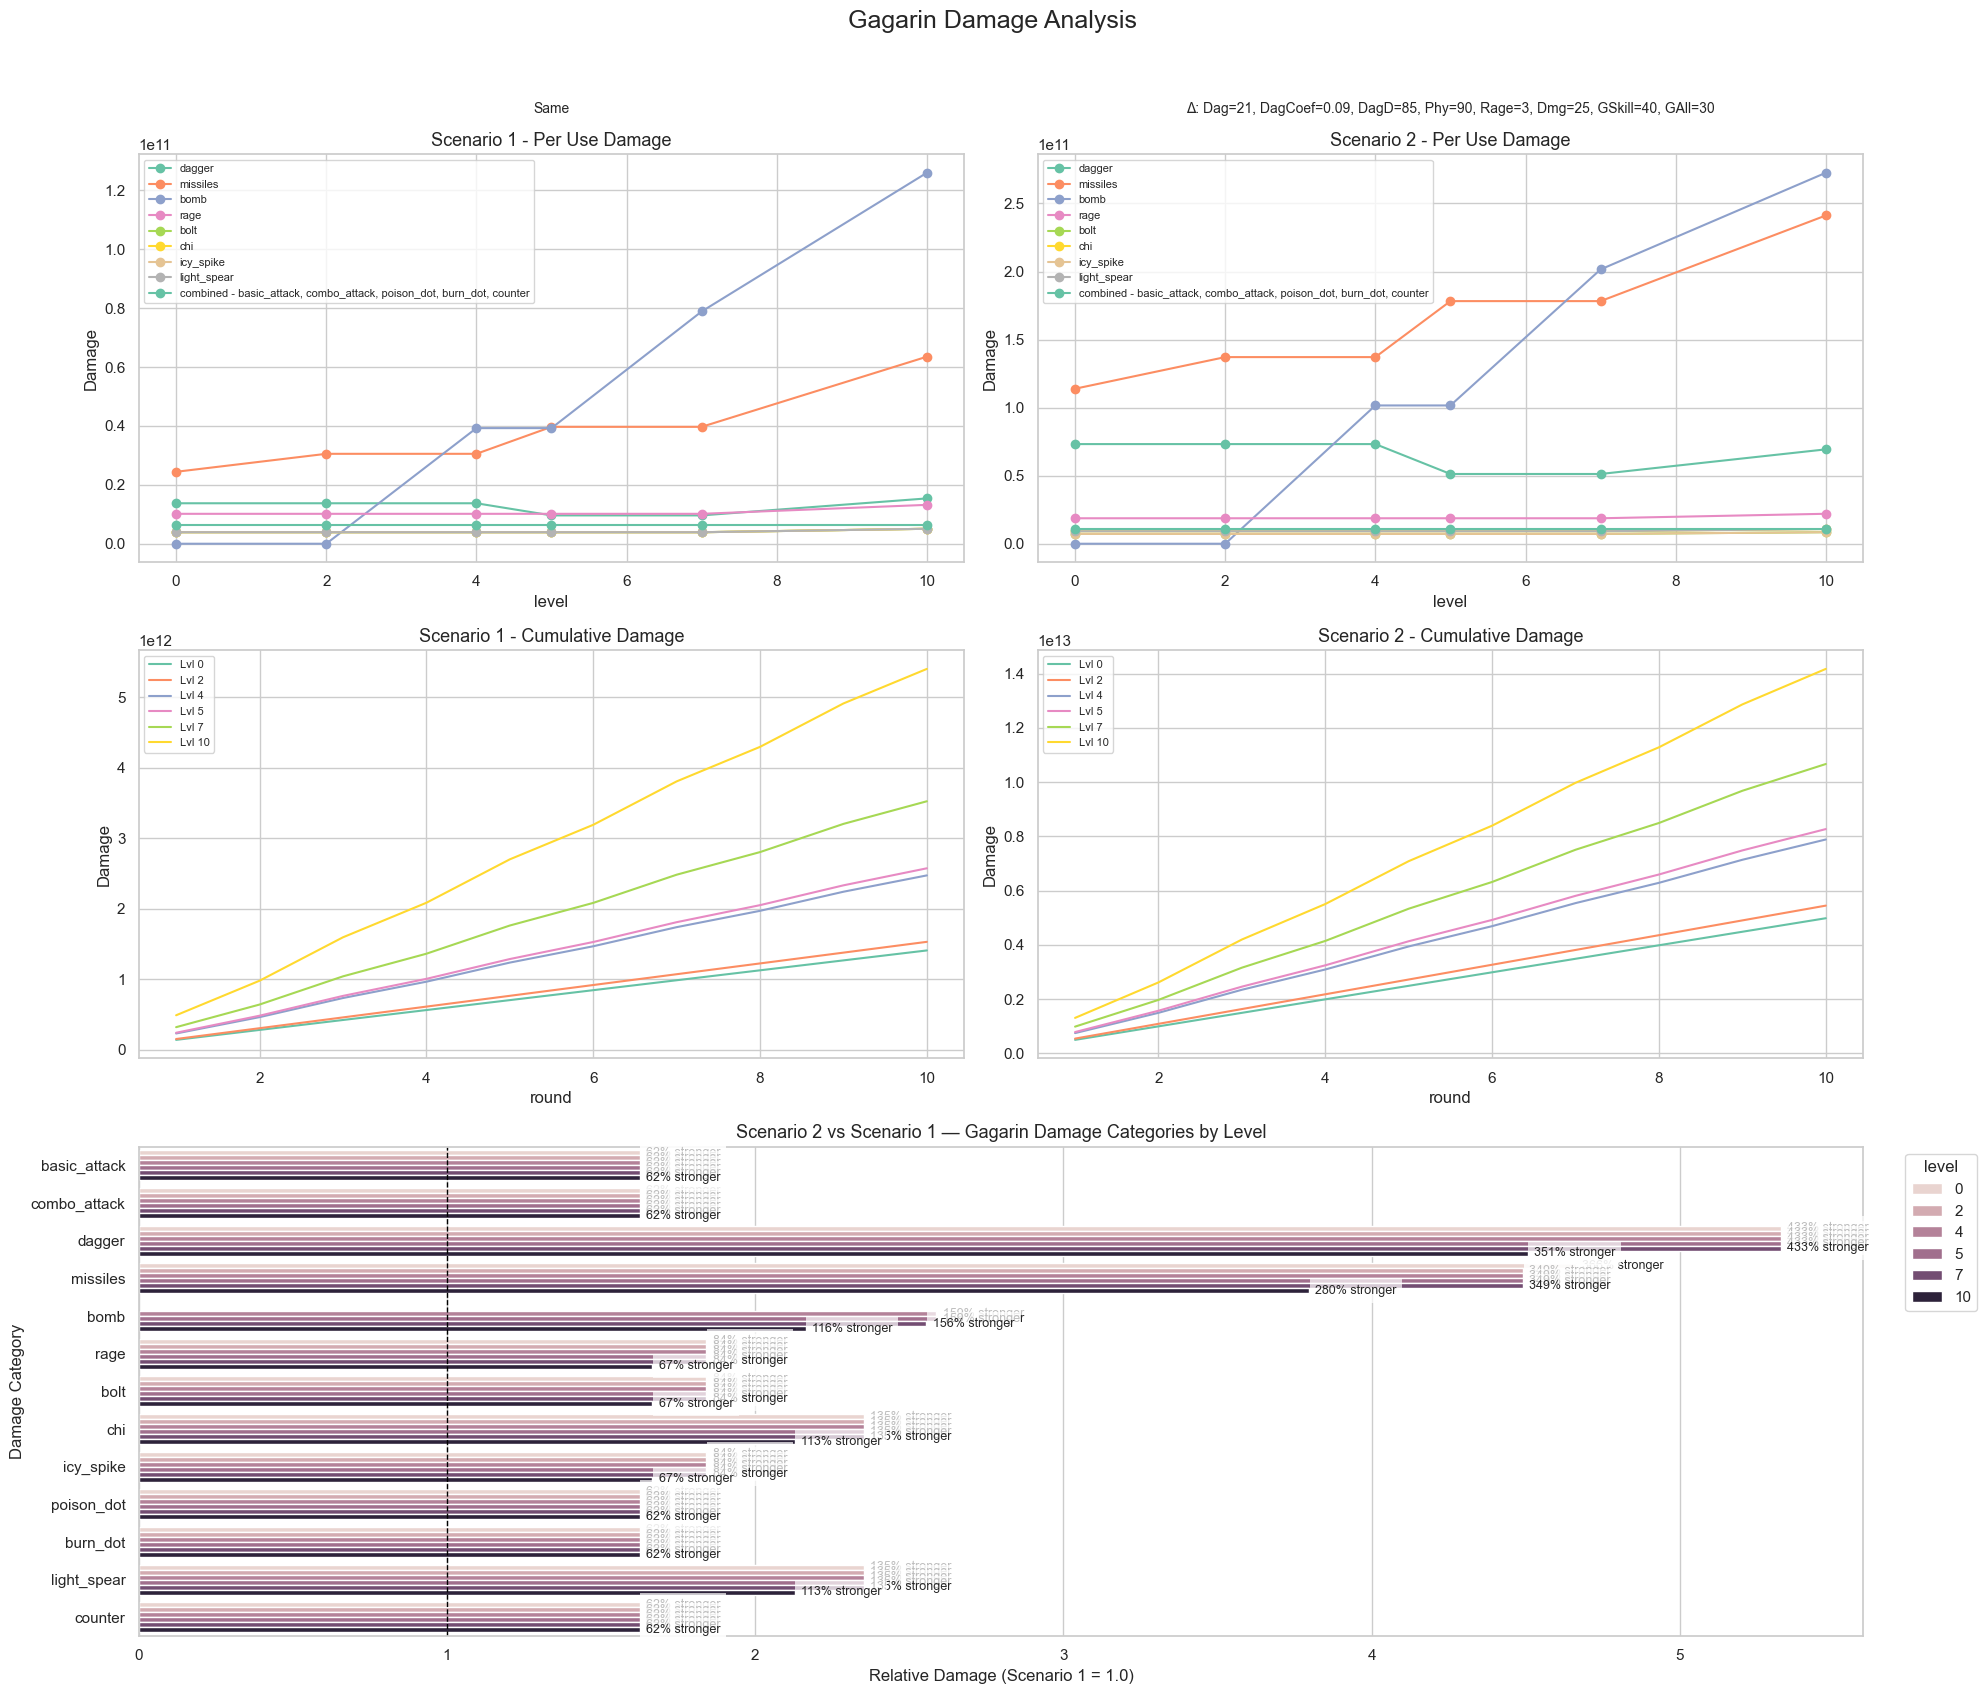

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# === Combine Minor Damage Types (<5%) for Per Use Damage Plot ===
def combine_minor_damage_types(df: pd.DataFrame, damage_types: list, threshold: float = 0.02):
    combined_types = []

    # Check if damage type is always below threshold at all levels
    for dtype in damage_types:
        if dtype not in df.columns:
            continue
        share = df[dtype] / df["total"]
        if (share < threshold).all():
            combined_types.append(dtype)

    # Create new column if any to combine
    if combined_types:
        combined_label = "combined - " + ", ".join(combined_types)
        df[combined_label] = df[combined_types].sum(axis=1)
        df = df.drop(columns=combined_types)
        damage_types = [dt for dt in damage_types if dt not in combined_types]
        damage_types.append(combined_label)

    return df, damage_types


# Theme
sns.set_theme(style="whitegrid", palette="Set2")

gagarin_damage_types = [
    "basic_attack", "combo_attack", "dagger", "missiles", "bomb",
    "rage", "bolt", "chi", "icy_spike", "poison_dot", "burn_dot",
    "light_spear", "counter"
]

# Map config scenario names
SCENARIO_NAME_MAP = {
    "Scenario 1": SCENARIO_1["name"],
    "Scenario 2": SCENARIO_2["name"],
}

# === Preprocess
df_g1, df_g2, df_merged_ggr = preprocess_skill_comparison(
    df_all_skills, "gagarin"
)

df_compare_ggr = build_percent_change_table(
    df_merged_ggr,
    damage_types=gagarin_damage_types
)

# === Create figure layout
fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
fig.suptitle("Gagarin Damage Analysis", fontsize=18, y=0.97)

# === Row 1: Per-Use Breakdown
for i, (scenario, df_plot_orig) in enumerate([("Scenario 1", df_g1), ("Scenario 2", df_g2)]):
    ax = fig.add_subplot(gs[0, i])
    df_plot = df_plot_orig.copy()

    # Combine minor types
    df_plot, damage_types_used = combine_minor_damage_types(df_plot, gagarin_damage_types)

    valid_types = [col for col in damage_types_used if col in df_plot.columns]
    df_plot.plot(
        x="level",
        y=valid_types,
        ax=ax,
        marker="o"
    )

    ax.set_title(f"{scenario} - Per Use Damage", fontsize=13)
    if scenario in SCENARIO_NAME_MAP:
        ax.text(0.5, 1.1, SCENARIO_NAME_MAP[scenario], fontsize=10,
                ha="center", transform=ax.transAxes)
    ax.set_xlabel("level")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 2: Cumulative Round Breakdown
for i, scenario in enumerate(["Scenario 1", "Scenario 2"]):
    ax = fig.add_subplot(gs[1, i])
    df_r = df_all_rounds[
        (df_all_rounds["source"] == "gagarin") & (df_all_rounds["scenario"] == scenario)
    ]
    for lvl in df_r["level"].unique():
        sub = df_r[df_r["level"] == lvl]
        ax.plot(sub["round"], sub["total_damage"], label=f"Lvl {lvl}")
    ax.set_title(f"{scenario} - Cumulative Damage", fontsize=13)
    ax.set_xlabel("round")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 3: Relative Damage Comparison Barplot
ax_full = fig.add_subplot(gs[2, :])

sns.barplot(
    data=df_compare_ggr,
    y="DamageType",
    x="Relative",
    hue="level",
    orient="h",
    dodge=True,
    ax=ax_full
)

ax_full.axvline(1.0, color="black", linestyle="--", linewidth=1)

for container in ax_full.containers:
    for bar in container:
        width = bar.get_width()
        if width == 0 or width is None:
            continue
        label = f"{abs(width - 1) * 100:.0f}% {'stronger' if width > 1 else 'weaker'}"
        x = width + 0.02 if width > 1 else width - 0.02
        ax_full.text(
            x,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha="left" if width > 1 else "right",
            va="center",
            fontsize=9,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )

ax_full.set_title("Scenario 2 vs Scenario 1 — Gagarin Damage Categories by Level", fontsize=13)
ax_full.set_xlabel("Relative Damage (Scenario 1 = 1.0)")
ax_full.set_ylabel("Damage Category")
ax_full.legend(title="level", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


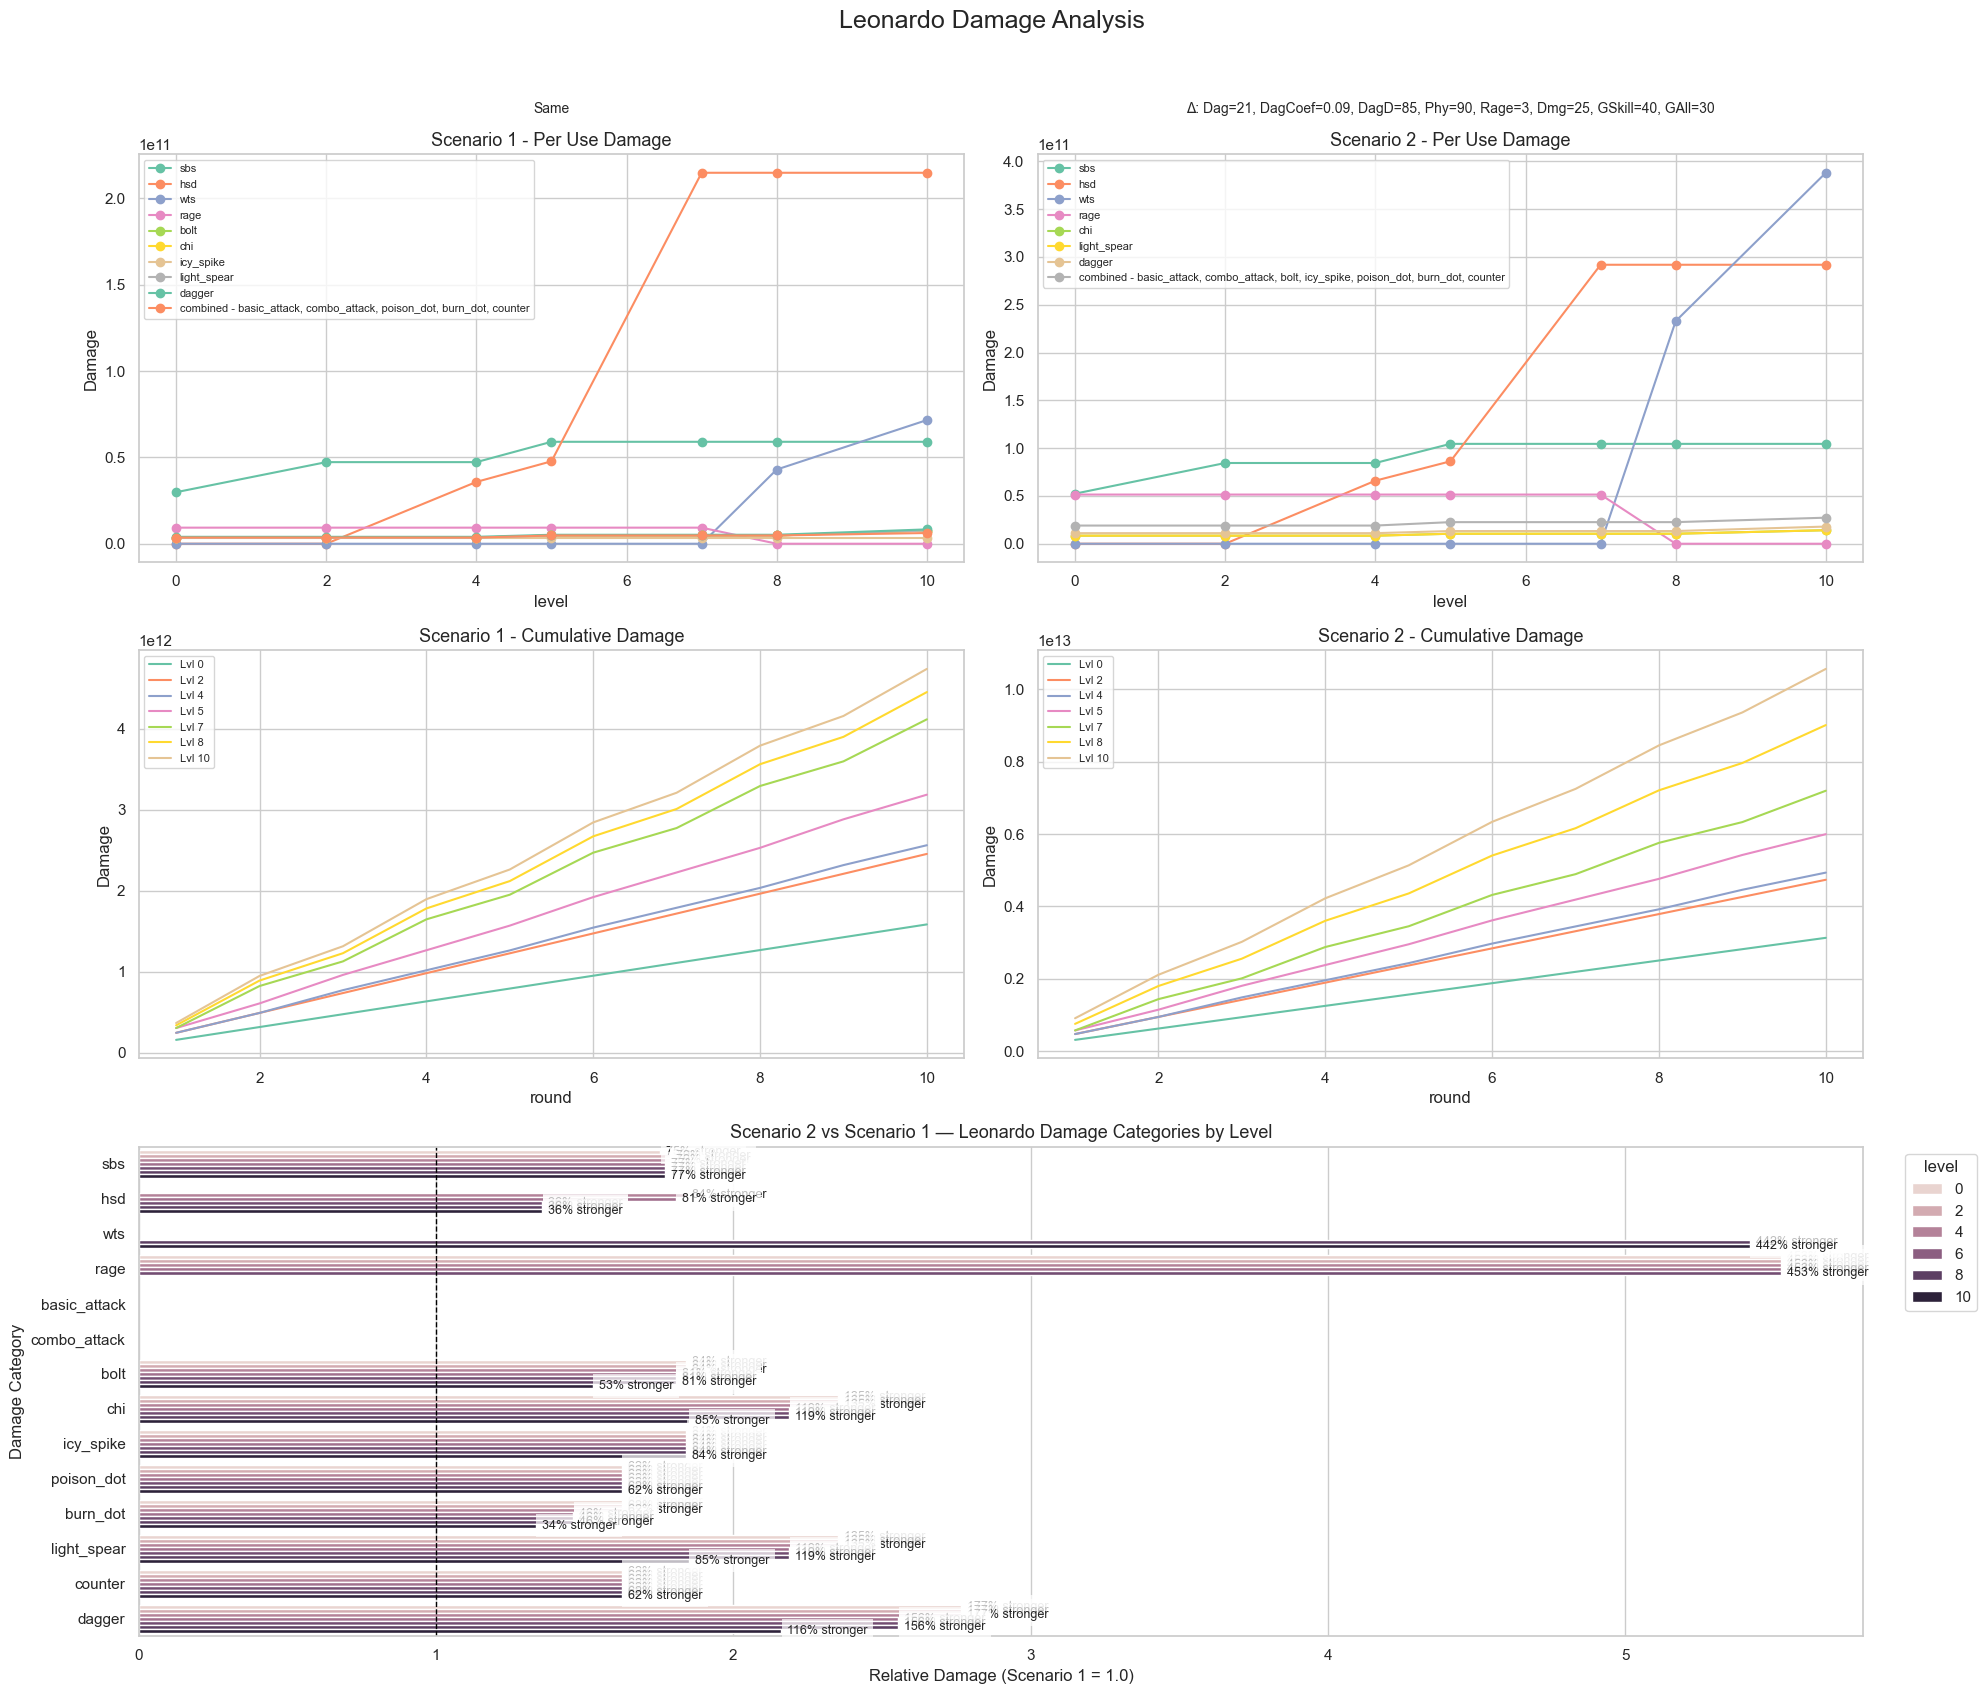

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# === Combine Minor Damage Types (<5%) for Per Use Damage Plot ===
def combine_minor_damage_types(df: pd.DataFrame, damage_types: list, threshold: float = 0.05):
    combined_types = []
    for dtype in damage_types:
        if dtype not in df.columns:
            continue
        share = df[dtype] / df["total"]
        if (share < threshold).all():
            combined_types.append(dtype)

    if combined_types:
        combined_label = "combined - " + ", ".join(combined_types)
        df[combined_label] = df[combined_types].sum(axis=1)
        df = df.drop(columns=combined_types)
        damage_types = [dt for dt in damage_types if dt not in combined_types]
        damage_types.append(combined_label)

    return df, damage_types

# === Setup ===
sns.set_theme(style="whitegrid", palette="Set2")

leonardo_damage_types = [
    "sbs", "hsd", "wts", "rage", "basic_attack", "combo_attack",
    "bolt", "chi", "icy_spike", "poison_dot", "burn_dot",
    "light_spear", "counter", "dagger", 
]

SCENARIO_NAME_MAP = {
    "Scenario 1": SCENARIO_1["name"],
    "Scenario 2": SCENARIO_2["name"],
}

# === Preprocess
df_l1, df_l2, df_merged_leo = preprocess_skill_comparison(
    df_all_skills, "leonardo"
)

df_compare_leo = build_percent_change_table(
    df_merged_leo,
    damage_types=leonardo_damage_types
)

# === Create figure layout
fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
fig.suptitle("Leonardo Damage Analysis", fontsize=18, y=0.97)

# === Row 1: Per-Use Breakdown
for i, (scenario, df_plot_orig) in enumerate([("Scenario 1", df_l1), ("Scenario 2", df_l2)]):
    ax = fig.add_subplot(gs[0, i])
    df_plot = df_plot_orig.copy()

    # Combine minor types
    df_plot, damage_types_used = combine_minor_damage_types(df_plot, leonardo_damage_types)

    df_plot.plot(
        x="level",
        y=damage_types_used,
        ax=ax,
        marker="o"
    )

    ax.set_title(f"{scenario} - Per Use Damage", fontsize=13)
    if scenario in SCENARIO_NAME_MAP:
        ax.text(0.5, 1.1, SCENARIO_NAME_MAP[scenario], fontsize=10,
                ha="center", transform=ax.transAxes)
    ax.set_xlabel("level")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 2: Cumulative Round Breakdown
for i, scenario in enumerate(["Scenario 1", "Scenario 2"]):
    ax = fig.add_subplot(gs[1, i])
    df_r = df_all_rounds[
        (df_all_rounds["source"] == "leonardo") & (df_all_rounds["scenario"] == scenario)
    ]
    for lvl in df_r["level"].unique():
        sub = df_r[df_r["level"] == lvl]
        ax.plot(sub["round"], sub["total_damage"], label=f"Lvl {lvl}")
    ax.set_title(f"{scenario} - Cumulative Damage", fontsize=13)
    ax.set_xlabel("round")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 3: Relative Damage Comparison Barplot
ax_full = fig.add_subplot(gs[2, :])

sns.barplot(
    data=df_compare_leo,
    y="DamageType",
    x="Relative",
    hue="level",
    orient="h",
    dodge=True,
    ax=ax_full
)

ax_full.axvline(1.0, color="black", linestyle="--", linewidth=1)

for container in ax_full.containers:
    for bar in container:
        width = bar.get_width()
        if width == 0 or width is None:
            continue
        label = f"{abs(width - 1) * 100:.0f}% {'stronger' if width > 1 else 'weaker'}"
        x = width + 0.02 if width > 1 else width - 0.02
        ax_full.text(
            x,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha="left" if width > 1 else "right",
            va="center",
            fontsize=9,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )

ax_full.set_title("Scenario 2 vs Scenario 1 — Leonardo Damage Categories by Level", fontsize=13)
ax_full.set_xlabel("Relative Damage (Scenario 1 = 1.0)")
ax_full.set_ylabel("Damage Category")
ax_full.legend(title="level", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


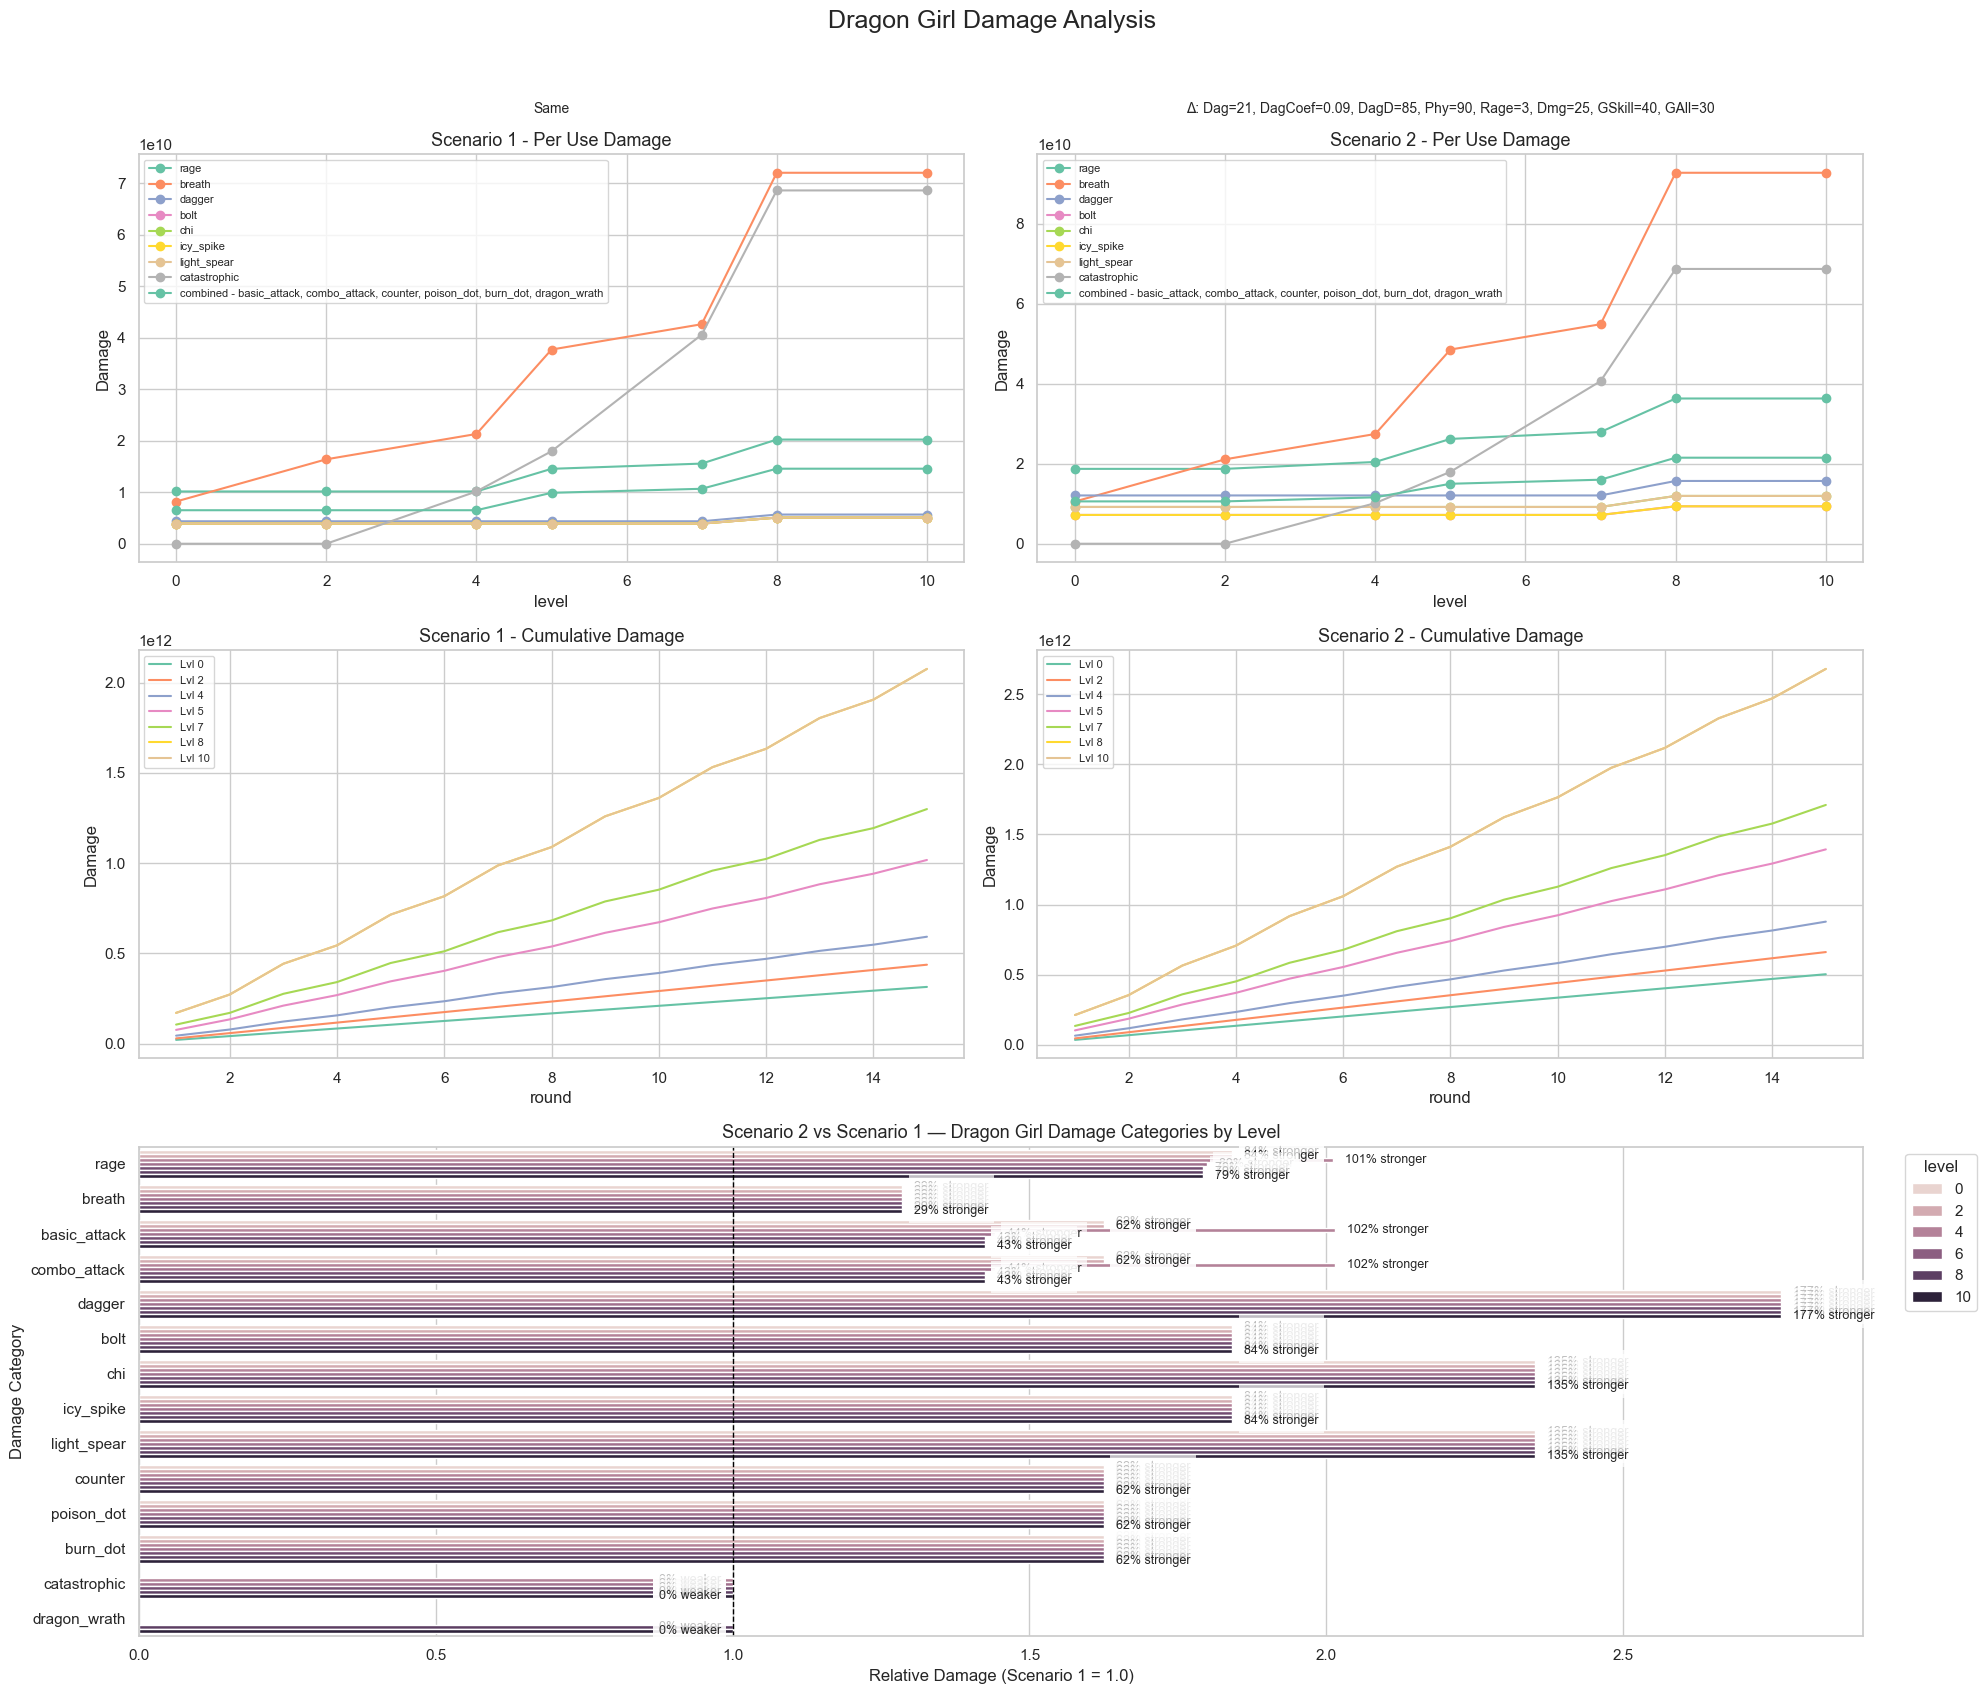

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# === Combine Minor Damage Types (<5%) for Per Use Damage Plot ===
def combine_minor_damage_types(df: pd.DataFrame, damage_types: list, threshold: float = 0.05):
    combined_types = []
    for dtype in damage_types:
        if dtype not in df.columns:
            continue
        share = df[dtype] / df["total"]
        if (share < threshold).all():
            combined_types.append(dtype)

    if combined_types:
        combined_label = "combined - " + ", ".join(combined_types)
        df[combined_label] = df[combined_types].sum(axis=1)
        df = df.drop(columns=combined_types)
        damage_types = [dt for dt in damage_types if dt not in combined_types]
        damage_types.append(combined_label)

    return df, damage_types

# === Setup ===
sns.set_theme(style="whitegrid", palette="Set2")

dragon_girl_damage_types = [
    "rage", "breath",
    "basic_attack", "combo_attack",
    "dagger", "bolt", "chi", "icy_spike", "light_spear", "counter",
    "poison_dot", "burn_dot",
    "catastrophic", "dragon_wrath",
]


SCENARIO_NAME_MAP = {
    "Scenario 1": SCENARIO_1["name"],
    "Scenario 2": SCENARIO_2["name"],
}

# === Preprocess
df_d1, df_d2, df_merged_dragon = preprocess_skill_comparison(
    df_all_skills, "dragon_girl"
)

df_compare_dragon = build_percent_change_table(
    df_merged_dragon,
    damage_types=dragon_girl_damage_types
)

# === Create figure layout
fig = plt.figure(figsize=(20, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
fig.suptitle("Dragon Girl Damage Analysis", fontsize=18, y=0.97)

# === Row 1: Per-Use Breakdown
for i, (scenario, df_plot_orig) in enumerate([("Scenario 1", df_d1), ("Scenario 2", df_d2)]):
    ax = fig.add_subplot(gs[0, i])
    df_plot = df_plot_orig.copy()

    # Combine minor types
    df_plot, damage_types_used = combine_minor_damage_types(df_plot, dragon_girl_damage_types)

    df_plot.plot(
        x="level",
        y=damage_types_used,
        ax=ax,
        marker="o"
    )

    ax.set_title(f"{scenario} - Per Use Damage", fontsize=13)
    if scenario in SCENARIO_NAME_MAP:
        ax.text(0.5, 1.1, SCENARIO_NAME_MAP[scenario], fontsize=10,
                ha="center", transform=ax.transAxes)
    ax.set_xlabel("level")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 2: Cumulative Round Breakdown
for i, scenario in enumerate(["Scenario 1", "Scenario 2"]):
    ax = fig.add_subplot(gs[1, i])
    df_r = df_all_rounds[
        (df_all_rounds["source"] == "dragon_girl") & (df_all_rounds["scenario"] == scenario)
    ]
    for lvl in df_r["level"].unique():
        sub = df_r[df_r["level"] == lvl]
        ax.plot(sub["round"], sub["total_damage"], label=f"Lvl {lvl}")
    ax.set_title(f"{scenario} - Cumulative Damage", fontsize=13)
    ax.set_xlabel("round")
    ax.set_ylabel("Damage")
    ax.grid(True)
    ax.legend(fontsize=8)

# === Row 3: Relative Damage Comparison Barplot
ax_full = fig.add_subplot(gs[2, :])

sns.barplot(
    data=df_compare_dragon,
    y="DamageType",
    x="Relative",
    hue="level",
    orient="h",
    dodge=True,
    ax=ax_full
)

ax_full.axvline(1.0, color="black", linestyle="--", linewidth=1)

for container in ax_full.containers:
    for bar in container:
        width = bar.get_width()
        if width == 0 or width is None:
            continue
        label = f"{abs(width - 1) * 100:.0f}% {'stronger' if width > 1 else 'weaker'}"
        x = width + 0.02 if width > 1 else width - 0.02
        ax_full.text(
            x,
            bar.get_y() + bar.get_height() / 2,
            label,
            ha="left" if width > 1 else "right",
            va="center",
            fontsize=9,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
        )

ax_full.set_title("Scenario 2 vs Scenario 1 — Dragon Girl Damage Categories by Level", fontsize=13)
ax_full.set_xlabel("Relative Damage (Scenario 1 = 1.0)")
ax_full.set_ylabel("Damage Category")
ax_full.legend(title="level", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


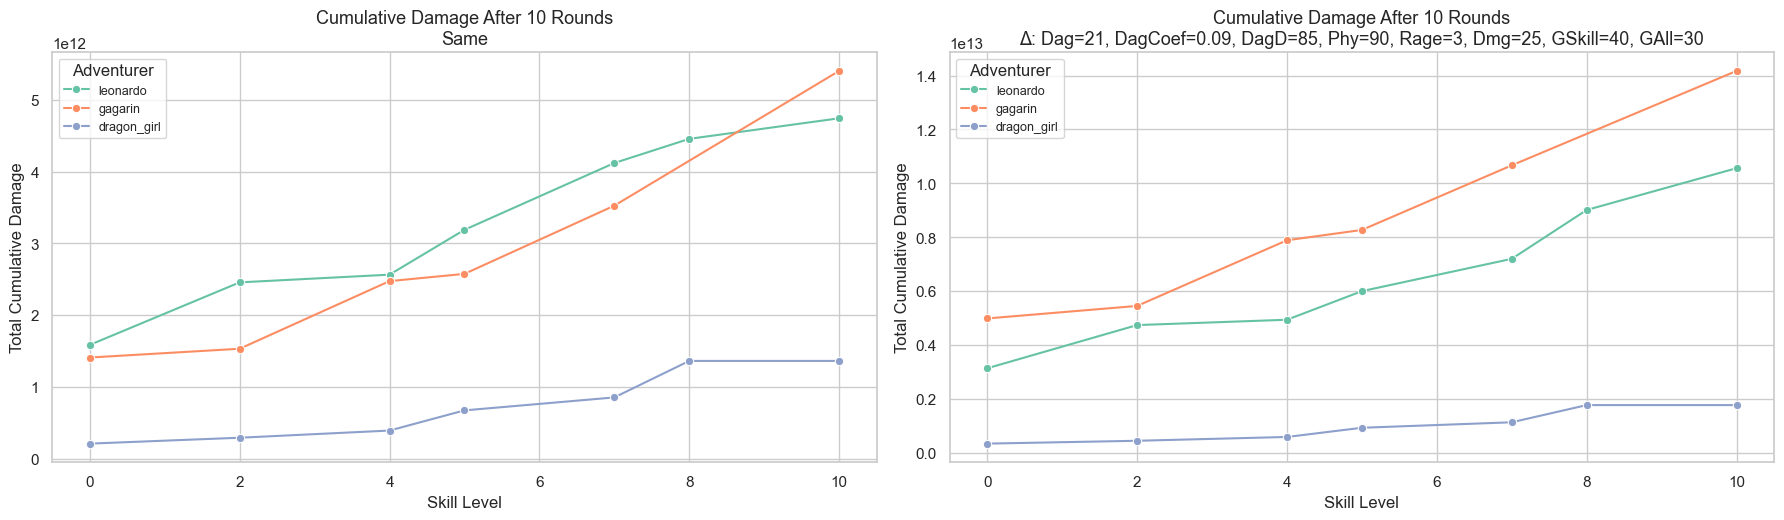

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Filter to Round 10 if not already filtered
df_final_round = df_all_rounds[df_all_rounds["round"] == 10].copy()

# Step 2: Ensure numeric types
df_final_round["level"] = pd.to_numeric(df_final_round["level"], errors="coerce")
df_final_round["total_damage"] = pd.to_numeric(df_final_round["total_damage"], errors="coerce")

# Step 3: Add "stacks_label" only for Dragon Girl
df_final_round["stacks_label"] = ""
if "stacks" in df_final_round.columns:
    dg_mask = df_final_round["source"].str.lower().str.contains("dragon")
    df_final_round.loc[dg_mask, "stacks_label"] = " - " + df_final_round.loc[dg_mask, "stacks"].astype(str)

# Step 4: Unified label (e.g., "dragon_girl - 20")
df_final_round["label"] = df_final_round["source"] + df_final_round["stacks_label"]

# Step 5: Create subplot grid
scenarios = df_final_round["scenario"].unique()
fig, axs = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(9 * len(scenarios), 6))
axs = [axs] if len(scenarios) == 1 else axs.flatten()

# Step 6: Plot per scenario
for i, scenario in enumerate(scenarios):
    df_scenario = df_final_round[df_final_round["scenario"] == scenario]
    ax = axs[i]

    sns.lineplot(
        data=df_scenario,
        x="level",
        y="total_damage",
        hue="label",
        marker="o",
        ax=ax
    )

    # Friendly name wrapping
    scenario_name = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    title_wrapped = f"Cumulative Damage After 10 Rounds\n{scenario_name}"
    ax.set_title(title_wrapped, fontsize=13)

    ax.set_ylabel("Total Cumulative Damage")
    ax.set_xlabel("Skill Level")
    ax.legend(title="Adventurer", fontsize=9)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


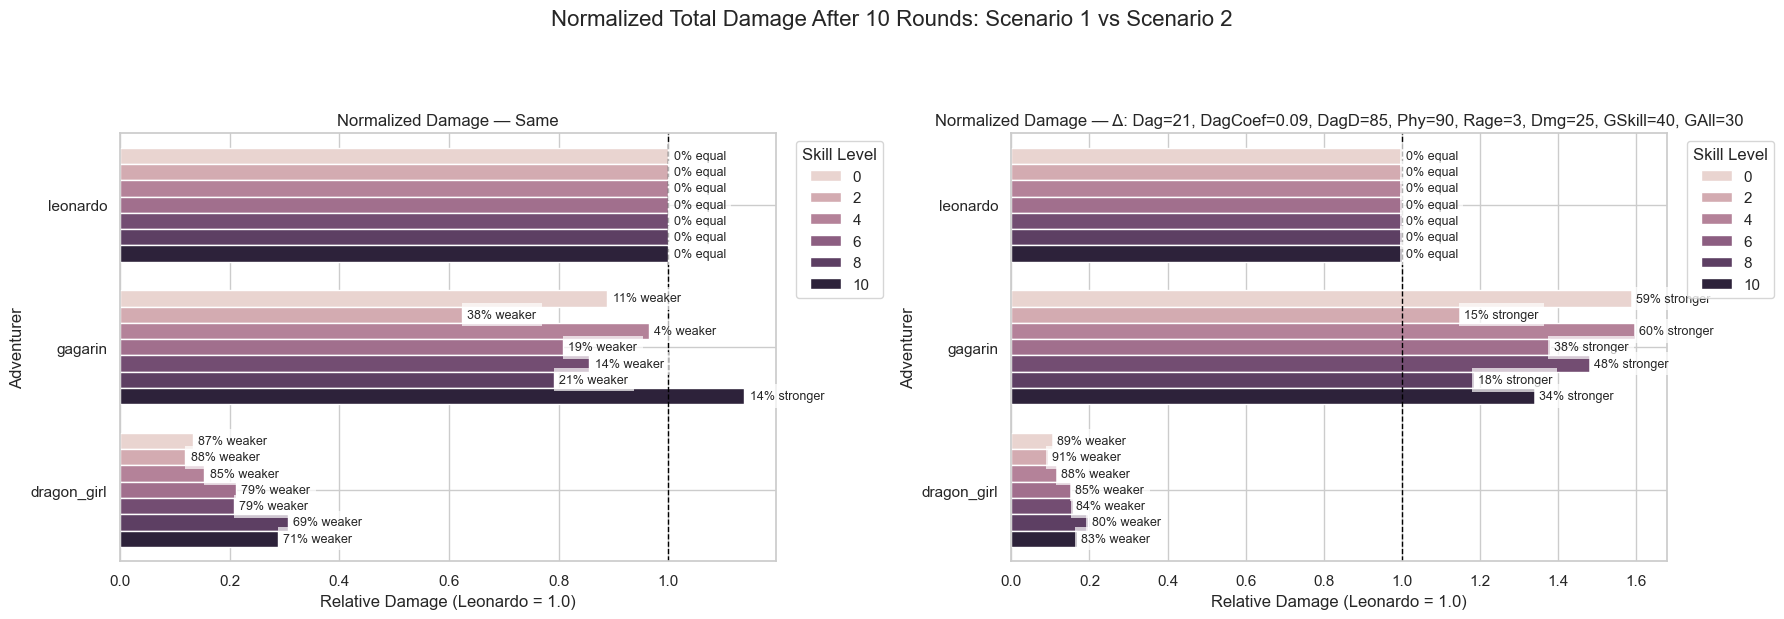

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure lowercase column names for consistency
df_final_round.columns = df_final_round.columns.str.lower()

# Filter Gagarin level 7
gaga_lvl7 = df_final_round[
    (df_final_round["source"] == "gagarin") &
    (df_final_round["level"] == 7)
].copy()

# Duplicate and set to level 8
gaga_lvl8 = gaga_lvl7.copy()
gaga_lvl8["level"] = 8

# Append to df_final_round
df_final_round = pd.concat([df_final_round, gaga_lvl8], ignore_index=True)

# === Filter Leonardo for baseline
baseline = df_final_round[df_final_round["source"] == "leonardo"][["scenario", "level", "total_damage"]]
baseline = baseline.rename(columns={"total_damage": "leonardodamage"})

# === Merge to normalize
df_norm = df_final_round.merge(baseline, on=["scenario", "level"], how="left")
df_norm["normalized"] = df_norm["total_damage"] / df_norm["leonardodamage"]

# === Plot setup
unique_scenarios = df_norm["scenario"].unique()
fig, axs = plt.subplots(1, len(unique_scenarios), figsize=(9 * len(unique_scenarios), 6))

if len(unique_scenarios) == 1:
    axs = [axs]

scenario_text = " vs ".join(unique_scenarios)
fig.suptitle(f"Normalized Total Damage After 10 Rounds: {scenario_text}", fontsize=16, y=1.03)

# === Plot per scenario
for i, scenario in enumerate(unique_scenarios):
    df_plot = df_norm[(df_norm["scenario"] == scenario) & df_norm["normalized"].notna()]
    ax = axs[i]

    sns.barplot(
        data=df_plot,
        y="label",
        x="normalized",
        hue="level",
        orient="h",
        dodge=True,
        ax=ax
    )

    ax.axvline(1.0, color="black", linestyle="--", linewidth=1)
    title = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    ax.set_title(f"Normalized Damage — {title}")
    ax.set_xlabel("Relative Damage (Leonardo = 1.0)")
    ax.set_ylabel("Adventurer")

    # Annotate bars
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            if pd.notna(width):
                diff_pct = (width - 1) * 100
                label = f"{abs(diff_pct):.0f}% {'stronger' if diff_pct > 0 else 'weaker' if diff_pct < 0 else 'equal'}"
                text_x = width + 0.01 if width > 0 else width - 0.01
                text_y = bar.get_y() + bar.get_height() / 2
                ax.text(
                    text_x,
                    text_y,
                    label,
                    va="center",
                    ha="left" if width > 0 else "right",
                    fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
                )

    ax.legend(title="Skill Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


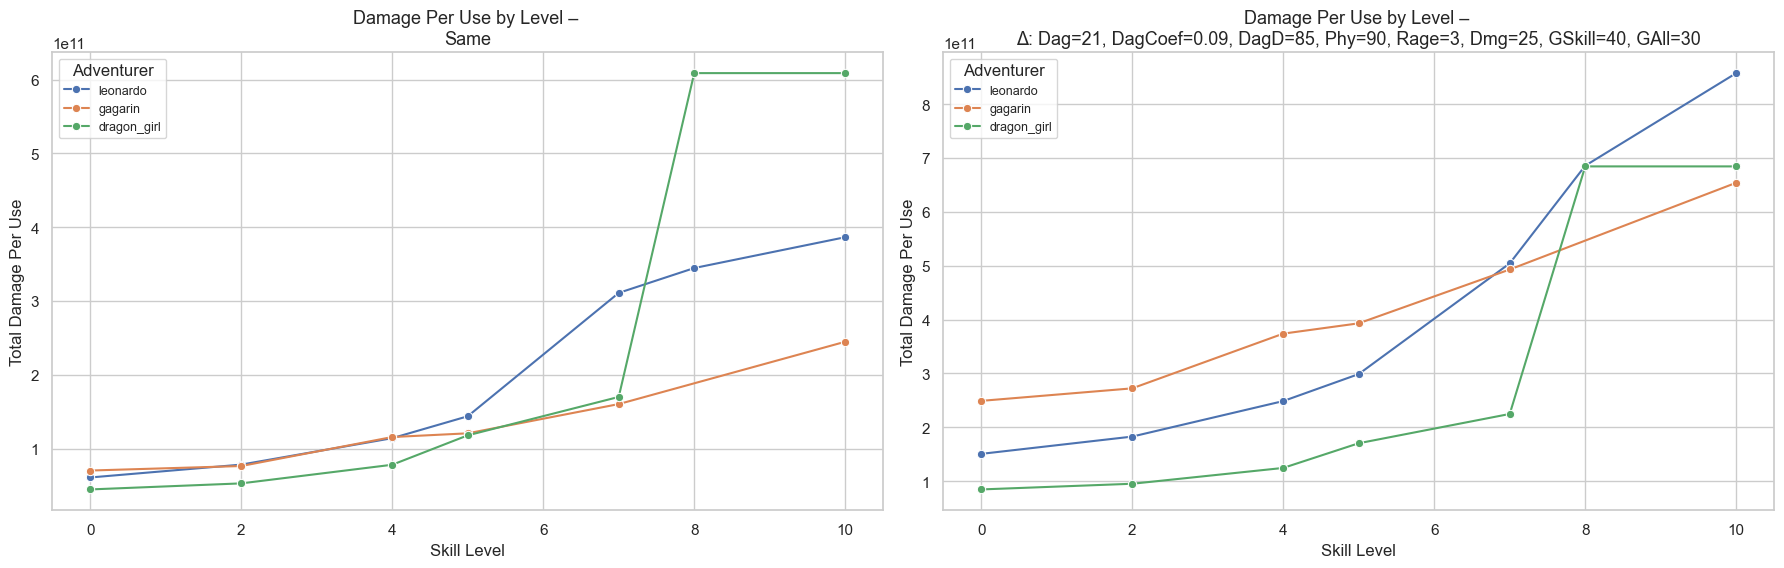

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Ensure damage column is numeric
df_all_skills["damage_per_use"] = pd.to_numeric(df_all_skills["total"], errors="coerce")

# === Add "stacks_label" for Dragon Girl clarity
df_all_skills["stacks_label"] = ""
if "stacks" in df_all_skills.columns:
    dg_mask = df_all_skills["source"].str.lower().str.contains("dragon")
    df_all_skills.loc[dg_mask, "stacks_label"] = " - " + df_all_skills.loc[dg_mask, "stacks"].astype(str)

# === Create unified label
df_all_skills["label"] = df_all_skills["source"] + df_all_skills["stacks_label"]

# === Ensure proper datatypes
df_all_skills["level"] = pd.to_numeric(df_all_skills["level"], errors="coerce")
df_all_skills["scenario"] = df_all_skills["scenario"].astype(str)

# === Plot aesthetics
sns.set(style="whitegrid")
scenarios = df_all_skills["scenario"].unique()

# === Create subplots by scenario
fig, axs = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(9 * len(scenarios), 6))
axs = [axs] if len(scenarios) == 1 else axs.flatten()

for i, scenario in enumerate(scenarios):
    ax = axs[i]
    df_scenario = df_all_skills[df_all_skills["scenario"] == scenario]

    sns.lineplot(
        data=df_scenario,
        x="level",
        y="damage_per_use",
        hue="label",
        marker="o",
        ax=ax
    )

    # Friendly title using optional map
    scenario_name = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    title = f"Damage Per Use by Level – \n{scenario_name}"
    ax.set_title(title, fontsize=13)

    ax.set_ylabel("Total Damage Per Use")
    ax.set_xlabel("Skill Level")
    ax.grid(True)
    ax.legend(title="Adventurer", fontsize=9)

plt.tight_layout()
plt.show()


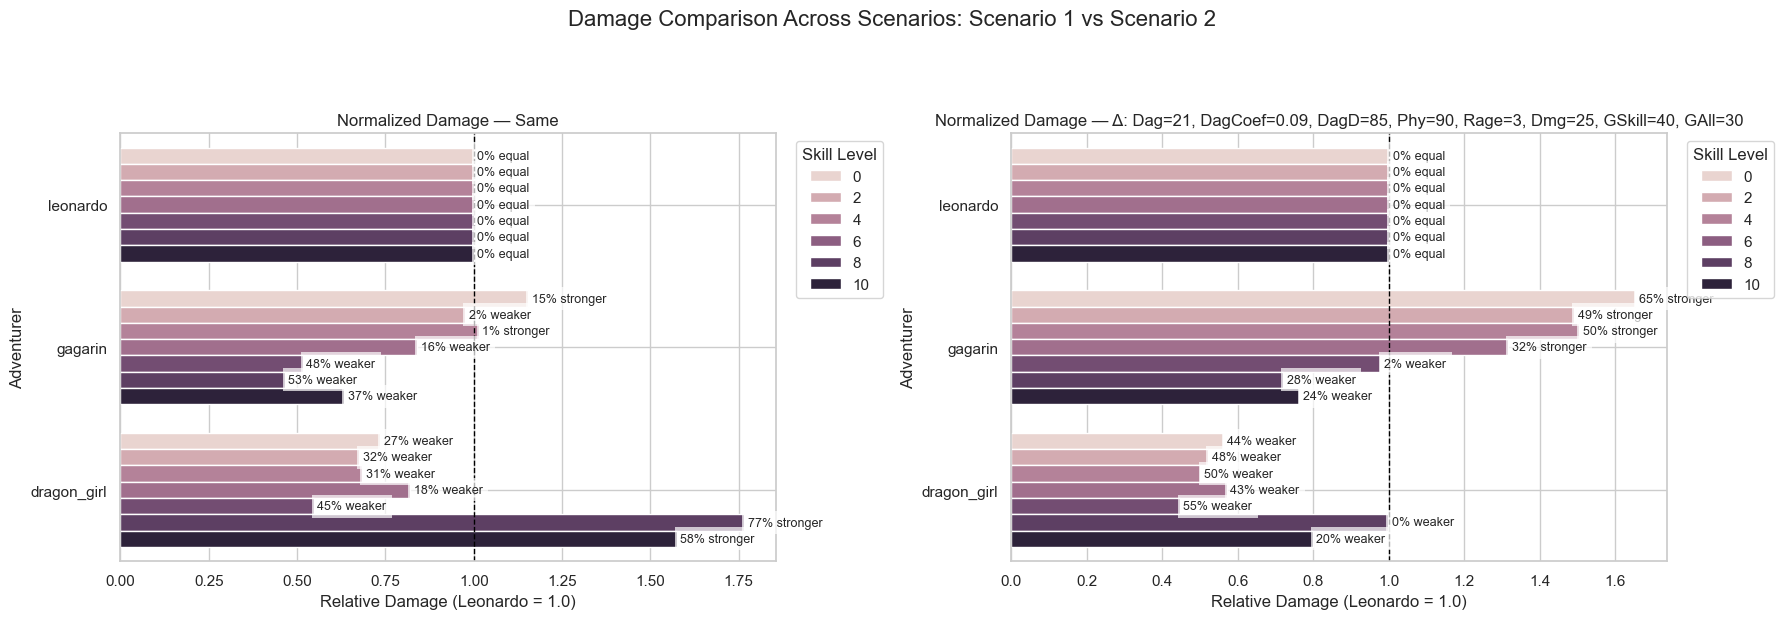

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Ensure lowercase column names ===
df_all_skills.columns = df_all_skills.columns.str.lower()

# === Filter Gagarin level 7 and duplicate as level 8
gaga_lvl7 = df_all_skills[
    (df_all_skills["source"] == "gagarin") &
    (df_all_skills["level"] == 7)
].copy()

gaga_lvl8 = gaga_lvl7.copy()
gaga_lvl8["level"] = 8

df_all_skills = pd.concat([df_all_skills, gaga_lvl8], ignore_index=True)

# === Ensure numeric damage
df_all_skills["damageperuse"] = pd.to_numeric(df_all_skills["total"], errors="coerce")

# === Add stacks label (only for dragon girl)
df_all_skills["stackslabel"] = ""
if "stacks" in df_all_skills.columns:
    dg_mask = df_all_skills["source"] == "dragon_girl"
    df_all_skills.loc[dg_mask, "stackslabel"] = " - " + df_all_skills.loc[dg_mask, "stacks"].astype(str)

# === Combined label
df_all_skills["label"] = df_all_skills["source"] + df_all_skills["stackslabel"]

# === Baseline: Leonardo
baseline = df_all_skills[df_all_skills["source"] == "leonardo"][["scenario", "level", "damageperuse"]]
baseline = baseline.rename(columns={"damageperuse": "leonardodamage"})

# === Merge to get normalized damage
df_norm = df_all_skills.merge(baseline, on=["scenario", "level"], how="left")
df_norm["normalized"] = df_norm["damageperuse"] / df_norm["leonardodamage"]

# === Plot
unique_scenarios = df_norm["scenario"].unique()
fig, axs = plt.subplots(1, len(unique_scenarios), figsize=(9 * len(unique_scenarios), 6))

if len(unique_scenarios) == 1:
    axs = [axs]

scenario_text = " vs ".join(unique_scenarios)
fig.suptitle(f"Damage Comparison Across Scenarios: {scenario_text}", fontsize=16, y=1.03)

for i, scenario in enumerate(unique_scenarios):
    df_plot = df_norm[(df_norm["scenario"] == scenario) & df_norm["normalized"].notna()]
    ax = axs[i]

    sns.barplot(
        data=df_plot,
        y="label",
        x="normalized",
        hue="level",
        orient="h",
        dodge=True,
        ax=ax
    )

    ax.axvline(1.0, color="black", linestyle="--", linewidth=1)
    title = SCENARIO_NAME_MAP.get(scenario, scenario) if "SCENARIO_NAME_MAP" in globals() else scenario
    ax.set_title(f"Normalized Damage — {title}")
    ax.set_xlabel("Relative Damage (Leonardo = 1.0)")
    ax.set_ylabel("Adventurer")

    # Annotate bars
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            if pd.notna(width):
                diff_pct = (width - 1) * 100
                label = f"{abs(diff_pct):.0f}% {'stronger' if diff_pct > 0 else 'weaker' if diff_pct < 0 else 'equal'}"
                text_x = width + 0.01 if width > 0 else width - 0.01
                text_y = bar.get_y() + bar.get_height() / 2
                ax.text(
                    text_x,
                    text_y,
                    label,
                    va="center",
                    ha="left" if width > 0 else "right",
                    fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
                )

    ax.legend(title="Skill Level", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
